### About Credit Card Fraud Analysis


<font color=grey> Business Understanding: <br>
In recent times, the number of fraud transactions has increased drastically, due to which credit card companies are facing a lot of challenges. <br>
For many banks, retaining high profitable customers is the most important business goal. Banking fraud, however, poses a significant threat to this goal.<br>
In this capstone project, I am building a fraud detection model to help banks identify credit card frauds and be vigilant enough to reduce losses incurred due to such unauthorised transactions by the fraudsters.

### Data import and preparation

<font color=grey> Process: <br>
- The data is imported by mounting the google drive <br>
- Important libraries are imported <br>
- Data is analysed for shape and data types <br>
- Data type conversion for date and time column has been carried out <br>
- Date and Time columns are split into days, months, seconds, minute and hour <br>
- Latitudes and Longitues are converted by Haversine formula to distances <br>
- Univariate and Bivariate Visualiztions have been carried out <br>
- Outlier Analysis has been done <br>
- Redundant columns have been removed manually and using heatmap <br>
- Onehotencoding has been performed for 2 categrical columns <br>
- Train data was split into train and validation data with stratification <br>
- Cross validation was performed to get rid of underfitting and overfitting <br>
- A function was written to carry out training of data and testing on validation set <br>
- Best parameters and estimators have been stored in a dataframe <br>
- Taking the best estimators, training algorithm was performed on Test data <br>
- Confusion Matrix was created <br>
- Cost Benefit Analysis was performed.

<font color=orange> Mounting gdrive for importing Data

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=False)

<font color=orange> Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install geopy
!pip install -U imbalanced-learn
!pip install xgboost
!pip install pydotplus

import pandas as pd
import numpy as np
from datetime import datetime, timedelta 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

import scipy.stats as stats

from geopy.distance import geodesic
import geopy.distance

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [4]:
# Importing required packages for visualization
!pip install graphviz
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [5]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 1000)

##### <font color=orange> Importing the data

In [6]:
train = pd.read_csv('fraudTrain.csv')
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [7]:
test = pd.read_csv('fraudTest.csv')
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [8]:
train.shape, test.shape

((1296675, 23), (555719, 23))

<font color=orange> Function created to extract information on dataset like null values, data types and unique values in columns

In [9]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [10]:
details(train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
Unnamed: 0,0,0.0,int64,1296675
trans_date_trans_time,0,0.0,object,1274791
cc_num,0,0.0,int64,983
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,52928
first,0,0.0,object,352
last,0,0.0,object,481
gender,0,0.0,object,2
street,0,0.0,object,983


In [11]:
details(test)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
Unnamed: 0,0,0.0,int64,555719
trans_date_trans_time,0,0.0,object,544760
cc_num,0,0.0,int64,924
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,37256
first,0,0.0,object,341
last,0,0.0,object,471
gender,0,0.0,object,2
street,0,0.0,object,924


<font color=lightgreen> From above table we can see there are no null values in any columns.

In [12]:
100*len(test)/len(train)

42.85723099465942

<font color=orange>Creating new dataframe excluding the first column

In [13]:
df_train = train.iloc[0:,1:]
df_test = test.iloc[0:,1:]

<font color=orange>Merging first and last names and dropping original column

In [14]:
df_train['Full_Name'] = df_train['first'] +' ' + df_train['last']
df_test['Full_Name'] = df_test['first'] +' ' + df_test['last']

In [15]:
df_train.drop(['first','last'],1,inplace=True)
df_test.drop(['first','last'],1,inplace=True)

<font color=orange>Modifying Datatypes for time and date columns and converting to datetime format

In [16]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'], errors='coerce')
df_train['dob'] = pd.to_datetime(df_train['dob'], errors='coerce')
df_train['unix_time'] = pd.to_datetime(df_train['unix_time'], errors='coerce')

<font color=orange>Converting dob to age and removing dob column

In [17]:
df_train['Transaction_Date'] = (df_train['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
df_train['age'] = df_train['Transaction_Date'].dt.year - df_train['dob'].dt.year
df_train.drop('dob',1,inplace=True)

In [18]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'], errors='coerce')  
df_test['dob'] = pd.to_datetime(df_test['dob'], errors='coerce')
df_test['unix_time'] = pd.to_datetime(df_test['unix_time'], errors='coerce')

In [19]:
df_test['Transaction_Date'] = (df_test['trans_date_trans_time']).dt.date.astype('datetime64[ns]')
df_test['age'] = df_test['Transaction_Date'].dt.year - df_test['dob'].dt.year
df_test.drop('dob',1,inplace=True)

<font color=orange>Creating new columns by splitting time and date columns 

In [20]:
df_train['weekday_no'] = df_train['trans_date_trans_time'].dt.dayofweek
df_train['week_day'] = df_train['trans_date_trans_time'].dt.day_name()
df_train['week_no'] = df_train['trans_date_trans_time'].dt.week
df_train['day_no'] = df_train['trans_date_trans_time'].dt.day
df_train['min_day'] = df_train['trans_date_trans_time'].dt.minute
df_train['hr_day'] = df_train['trans_date_trans_time'].dt.hour
df_train['month_name'] = df_train['trans_date_trans_time'].dt.month_name()
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_train['year'] = df_train['trans_date_trans_time'].dt.year
df_train['year_dayno'] = df_train['trans_date_trans_time'].dt.dayofyear

In [21]:
df_test['weekday_no'] = df_test['trans_date_trans_time'].dt.dayofweek
df_test['week_day'] = df_test['trans_date_trans_time'].dt.day_name()
df_test['week_no'] = df_test['trans_date_trans_time'].dt.week
df_test['day_no'] = df_test['trans_date_trans_time'].dt.day
df_test['min_day'] = df_test['trans_date_trans_time'].dt.minute
df_test['hr_day'] = df_test['trans_date_trans_time'].dt.hour
df_test['month_name'] = df_test['trans_date_trans_time'].dt.month_name()
df_test['month'] = df_test['trans_date_trans_time'].dt.month
df_test['year'] = df_test['trans_date_trans_time'].dt.year
df_test['year_dayno'] = df_test['trans_date_trans_time'].dt.dayofyear

<font color=orange>Using Haversine formula for converting latitudes and longitudes to distances

In [22]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    ''' Feed longitude first and latitude second'''

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  #6367
    return km

<font color=orange> Getting distance from same (first) origin to all places

In [23]:
#Distance from same origin people co-ord 
df_train['dist_same_origin_co-ord(kms)'] = haversine_np(df_train['long'][0], df_train['lat'][0], df_train.loc[1:, 'long'], df_train.loc[1:, 'lat'])
#longitude first, latitude second

In [24]:
#Distance from same origin people co-ord 
df_test['dist_same_origin_co-ord(kms)'] = haversine_np(df_test['long'][0], df_test['lat'][0], df_test.loc[1:, 'long'], df_test.loc[1:, 'lat'])
#longitude first, latitude second

<font color=orange> Getting distance between successive places

In [25]:
#Distance between successive people co-ord  
df_train['distance_successive_co-ord(kms)'] = haversine_np(df_train.long.shift(), df_train.lat.shift(), df_train.loc[1:, 'long'], df_train.loc[1:, 'lat'])
#longitude first, latitude second

In [26]:
#Distance between successive people co-ord  
df_test['distance_successive_co-ord(kms)'] = haversine_np(df_test.long.shift(), df_test.lat.shift(), df_test.loc[1:, 'long'], df_test.loc[1:, 'lat'])
#longitude first, latitude second

<font color=orange> Getting distance from place of transaction to merchant

In [27]:
#Distance between people co-ord and merchant co-ord
df_train['distance_people_to_merchant_co-ord(kms)'] = haversine_np(df_train['long'],df_train['lat'],df_train['merch_long'],df_train['merch_lat'])
#longitude first, latitude second

In [28]:
#Distance between people co-ord and merchant co-ord
df_test['distance_people_to_merchant_co-ord(kms)'] = haversine_np(df_test['long'],df_test['lat'],df_test['merch_long'],df_test['merch_lat'])
#longitude first, latitude second

<font color=orange> Calculating delta time in seconds and days elapsed

In [29]:
# Delta between successive times
df_train['delta_time'] = df_train['trans_date_trans_time']-df_train['trans_date_trans_time'].shift()

# Delta between successive times in seconds
df_train['delta_time(sec)'] = df_train['delta_time'].dt.total_seconds()

# Delta time elapsed from origin
dt = pd.to_datetime(df_train['trans_date_trans_time'].iloc[0])
df_train['delta_time_elapsed'] = df_train['trans_date_trans_time'] - dt

# Delta time from origin converted to days
df_train['delta_time_elapsed(days)'] = df_train['delta_time_elapsed'].dt.days

In [30]:
# Delta between successive times
df_test['delta_time'] = df_test['trans_date_trans_time']-df_test['trans_date_trans_time'].shift()

# Delta between successive times in seconds
df_test['delta_time(sec)'] = df_test['delta_time'].dt.total_seconds()

# Delta time elapsed from origin
dt = pd.to_datetime(df_test['trans_date_trans_time'].iloc[0])
df_test['delta_time_elapsed'] = df_test['trans_date_trans_time'] - dt

# Delta time from origin converted to days
df_test['delta_time_elapsed(days)'] = df_test['delta_time_elapsed'].dt.days

<font color=orange> Converting NaN of first value to 0

In [31]:
df_train.loc[pd.isnull(df_train['dist_same_origin_co-ord(kms)']), ['dist_same_origin_co-ord(kms)']] = 0.0
df_train.loc[pd.isnull(df_train['distance_successive_co-ord(kms)']), ['distance_successive_co-ord(kms)']] = 0.0
df_train.loc[pd.isnull(df_train['delta_time']), ['delta_time']] = pd.to_timedelta('0 days 00:00:00')
df_train.loc[pd.isnull(df_train['delta_time(sec)']), ['delta_time(sec)']] = 0.0

In [32]:
df_test.loc[pd.isnull(df_test['dist_same_origin_co-ord(kms)']), ['dist_same_origin_co-ord(kms)']] = 0.0
df_test.loc[pd.isnull(df_test['distance_successive_co-ord(kms)']), ['distance_successive_co-ord(kms)']] = 0.0
df_test.loc[pd.isnull(df_test['delta_time']), ['delta_time']] = pd.to_timedelta('0 days 00:00:00')
df_test.loc[pd.isnull(df_test['delta_time(sec)']), ['delta_time(sec)']] = 0.0

<font color=orange> Info of dataset with new columns

In [33]:
df_train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Full_Name,Transaction_Date,age,weekday_no,week_day,week_no,day_no,min_day,hr_day,month_name,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time,delta_time(sec),delta_time_elapsed,delta_time_elapsed(days)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,Jennifer Banks,2019-01-01,31,1,Tuesday,1,1,0,0,January,1,2019,1,0.000000,0.000000,78.597568,0 days 00:00:00,0.0,0 days 00:00:00,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,Stephanie Gill,2019-01-01,41,1,Tuesday,1,1,0,0,January,1,2019,1,3311.583494,3311.583494,30.212176,0 days 00:00:26,26.0,0 days 00:00:26,0


In [34]:
df_test.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Full_Name,Transaction_Date,age,weekday_no,week_day,week_no,day_no,min_day,hr_day,month_name,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time,delta_time(sec),delta_time_elapsed,delta_time_elapsed(days)
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1970-01-01 00:00:01.371816865,33.986391,-81.200714,0,Jeff Elliott,2020-06-21,52,6,Sunday,25,21,14,12,June,6,2020,173,0.000000,0.000000,24.561462,0 days 00:00:00,0.0,0 days 00:00:00,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1970-01-01 00:00:01.371816873,39.450498,-109.960431,0,Joanne Williams,2020-06-21,30,6,Sunday,25,21,14,12,June,6,2020,173,2694.747922,2694.747922,104.925092,0 days 00:00:08,8.0,0 days 00:00:08,0


In [35]:
details(df_train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
trans_date_trans_time,0,0.0,datetime64[ns],1274791
cc_num,0,0.0,int64,983
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,52928
gender,0,0.0,object,2
street,0,0.0,object,983
city,0,0.0,object,894
state,0,0.0,object,51
zip,0,0.0,int64,970


In [36]:
details(df_test)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
trans_date_trans_time,0,0.0,datetime64[ns],544760
cc_num,0,0.0,int64,924
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,37256
gender,0,0.0,object,2
street,0,0.0,object,924
city,0,0.0,object,849
state,0,0.0,object,50
zip,0,0.0,int64,912


In [37]:
df_train.shape, df_test.shape

((1296675, 39), (555719, 39))

### <font color=Blue> Analysis

<font color=orange> Total Transactions

In [38]:
non_fraud_train = df_train[df_train['is_fraud'] == 0]
fraud_train = df_train[df_train['is_fraud'] == 1]

non_fraud_test = df_test[df_test['is_fraud'] == 0]
fraud_test = df_test[df_test['is_fraud'] == 1]

In [39]:
print(len(non_fraud_train))
print(len(fraud_train))
print(len(non_fraud_test))
print(len(fraud_test))

1289169
7506
553574
2145


<font color=orange> Total Transaction amount

In [40]:
print('Train: non_fraud: ',df_train['amt'].loc[df_train['is_fraud'] == 0].sum())
print('Train: fraud: ',df_train['amt'].loc[df_train['is_fraud'] == 1].sum())

Train: non_fraud:  87234340.28999999
Train: fraud:  3988088.6100000003


In [41]:
print('Test: non_fraud: ',df_test['amt'].loc[df_test['is_fraud'] == 0].sum())
print('Test: fraud: ',df_test['amt'].loc[df_test['is_fraud'] == 1].sum())

Test: non_fraud:  37429578.43
Test: fraud:  1133324.6800000002


In [42]:
# Monthly non-fraud Transaction Amount
non_fraud_train.groupby('month_name')['amt'].mean()

month_name
April        67.752309
August       67.182560
December     68.222098
February     67.317519
January      67.179179
July         67.876023
June         68.367403
March        68.030849
May          67.199977
November     67.438852
October      67.251225
September    67.377040
Name: amt, dtype: float64

In [43]:
#Montlhly fradualent transaction amount
fraud_train.groupby('month_name')['amt'].mean()

month_name
April        522.479749
August       533.903482
December     566.144493
February     536.929883
January      523.410766
July         570.095438
June         520.980247
March        502.907985
May          532.380203
November     516.256366
October      567.708634
September    520.754474
Name: amt, dtype: float64

<font color=lightgreen> We can see that  mean of fradualent transaction amount is more than that of normal transactions.

<font color=orange> Creditcard numbers with highest transactions

In [44]:
# Credit card numbers with most transactions
df_train.groupby('cc_num')['is_fraud'].sum().sort_values(ascending=False)[:10]  

cc_num
3520550088202337       19
4593569795412          19
4260128500325          18
4874006077381178       16
3556613125071656       16
3576021480694169       16
3575540972310993       16
4400011257587661852    16
30074693890476         16
6011366578560244       16
Name: is_fraud, dtype: int64

In [45]:
# Top fraudulent transaction amount
fraud_train[fraud_train['is_fraud'] == 1]['amt'].sort_values(ascending=False)[:10]   

1262544    1376.04
514148     1371.81
30239      1334.07
1258483    1324.80
821435     1313.18
1258594    1312.98
872879     1294.83
75418      1292.21
531246     1289.89
878175     1289.07
Name: amt, dtype: float64

<font color=orange> Aggregation of amount by year and category for fradualent transactions

In [46]:
fraud_train.groupby(["year",'category'])['amt'].agg(['sum'])  

sum
year category                  
2019 entertainment     82990.86
     food_dining       12401.85
     gas_transport      5433.09
     grocery_net        1172.03
     grocery_pos      375168.02
     health_fitness     1944.62
     home              33465.91
     kids_pets          3076.31
     misc_net         500575.67
     misc_pos          31586.32
     personal_care      4024.29
     shopping_net    1202563.42
     shopping_pos     512650.43
     travel              770.05
2020 entertainment     34332.93
     food_dining        5729.77
     gas_transport      2161.02
     grocery_net         457.79
     grocery_pos      168629.88
     health_fitness      748.42
     home              17505.75
     kids_pets          1254.77
     misc_net         228691.09
     misc_pos          22984.70
     personal_care      1733.23
     shopping_net     509160.29
     shopping_pos     226594.66
     travel              281.44

<font color=orange> Top 10 fradualent credit card numbers with amount

In [47]:
fraud_train.groupby(['cc_num'])['amt'].sum().sort_values(ascending=False)[:10]

cc_num
3520550088202337       12011.59
5388659976630693       11061.27
4633065159406313       10994.76
4855488158131690372    10894.97
6011693194885790       10705.82
3519232971341141       10562.21
2720433095629877       10454.66
6011935564104173       10437.00
4168696938629925       10404.97
3518669219150142       10277.79
Name: amt, dtype: float64

<font color=orange> People creating most frauds at distance from origin

In [48]:
fraud_train.groupby(['Full_Name'])['dist_same_origin_co-ord(kms)'].mean().sort_values(ascending=False)[:10]

Full_Name
Cassandra Sanders    7326.312343
Mark Brown           6176.567153
Thomas Payne         5729.464251
Bradley Adkins       5621.625323
Audrey Gonzalez      3748.082298
Cynthia Davis        3747.053451
Kendra King          3730.563569
Joanne Padilla       3718.416352
Amanda Adams         3696.424309
Felicia Mckee        3675.005580
Name: dist_same_origin_co-ord(kms), dtype: float64

<font color=orange> Merchants creating most frauds at distance from origin

In [49]:
fraud_train.groupby(['merchant'])['dist_same_origin_co-ord(kms)'].mean().sort_values(ascending=False)[:10]

merchant
fraud_Stokes, Christiansen and Sipes    6176.567153
fraud_Windler LLC                       3558.083569
fraud_Friesen Ltd                       3514.358835
fraud_Thompson-Gleason                  3467.200394
fraud_Hackett Group                     3443.726990
fraud_McGlynn-Jaskolski                 3225.128682
fraud_Jerde-Hermann                     2802.343128
fraud_Reichel, Bradtke and Blanda       2774.839930
fraud_Baumbach Ltd                      2692.430872
fraud_Connelly PLC                      2657.237141
Name: dist_same_origin_co-ord(kms), dtype: float64

<font color=orange> Mean amount in cities with fraud

In [50]:
fraud_train.groupby(['city'])['amt'].mean().sort_values(ascending=False)[:10]

city
De Lancey         926.156667
North East        918.425556
Schaefferstown    897.211111
Thida             888.572500
Harrodsburg       884.250000
Oakford           878.527500
Karns City        874.505714
Fordoche          869.980000
Glade Spring      864.783750
Manley            864.646000
Name: amt, dtype: float64

<font color=orange> Work profile in which highest fraud is committed

In [51]:
fraud_train.groupby(['job'])['amt'].mean().sort_values(ascending=False)[:10]

job
Architect                       948.818182
Designer, jewellery             899.408571
Gaffer                          897.211111
Ship broker                     874.505714
Community education officer     869.980000
Clinical psychologist           864.783750
Research scientist (medical)    842.231250
Programmer, multimedia          819.841667
Hydrologist                     818.023889
Medical physicist               801.131429
Name: amt, dtype: float64

### <font color=Blue> Visualization

<font color=orange> Data Imbalance Check

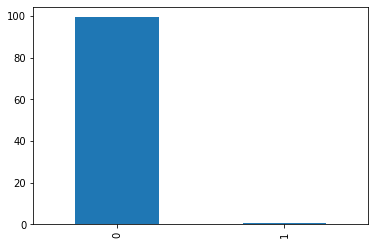

In [52]:
round(100*df_train['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

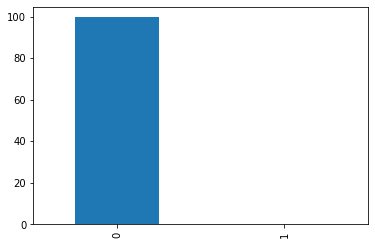

In [53]:
round(100*df_test['is_fraud'].value_counts(normalize=True),2).plot(kind='bar', figsize=(6,4))
plt.show()

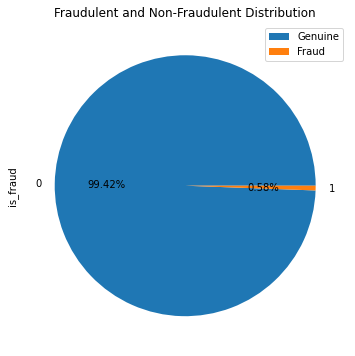

In [54]:
round(100*df_train['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

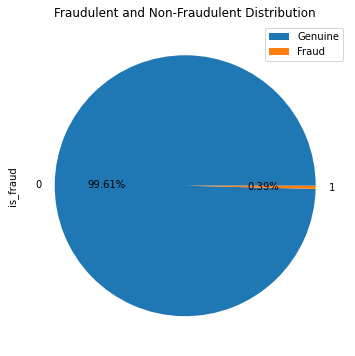

In [55]:
round(100*df_test['is_fraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

<font color=lightgreen> From the above graphs we can see the imbalance of the data

<font color=orange> Univariate Analysis

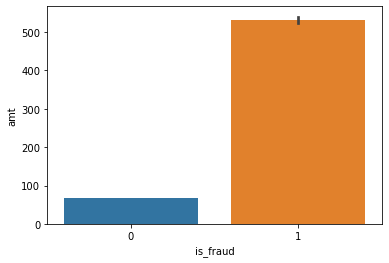

In [56]:
# Fraud and non-fraud amount
sns.barplot(data=df_train, x='is_fraud', y='amt')
plt.show()

<font color=lightgreen> We can see the amount of fraudulent transactions is more than that of genuine transactions

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

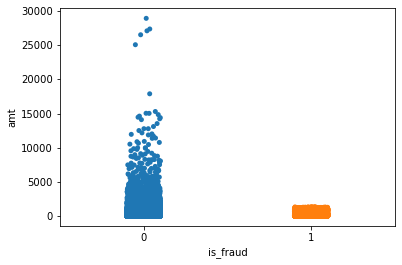

In [57]:
sns.stripplot( x = df_train['is_fraud'], y= df_train['amt'], data=df_train)

<AxesSubplot:xlabel='gender'>

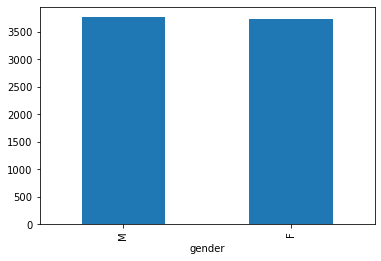

In [58]:
# Gender
df_train.groupby('gender')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='state'>

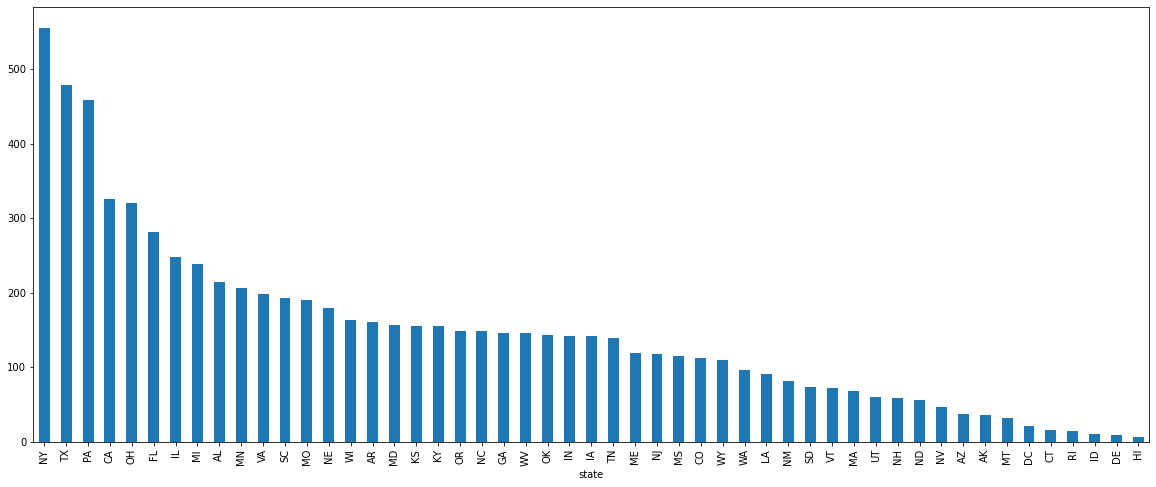

In [59]:
fraud_train.groupby('state')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,8))

<font color=lightgreen> We can see highest fraud transactions happen in Newyork, Texas, Pennsylvania, California, Ohio

<AxesSubplot:xlabel='category'>

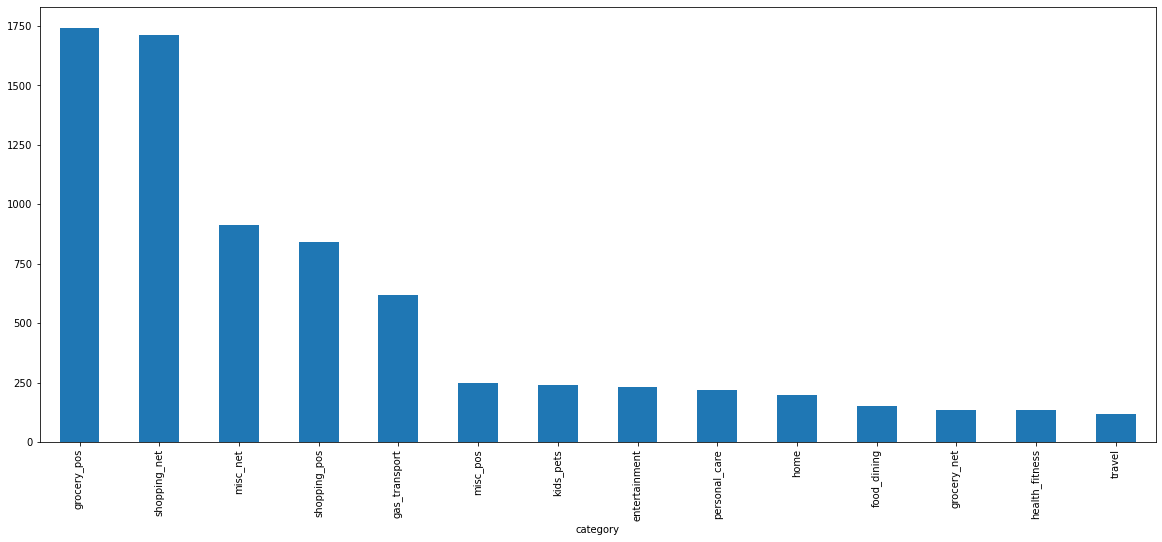

In [60]:
fraud_train.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,8))

<font color=lightgreen> Highest fraud transactions are shown in categories above

<AxesSubplot:xlabel='week_day'>

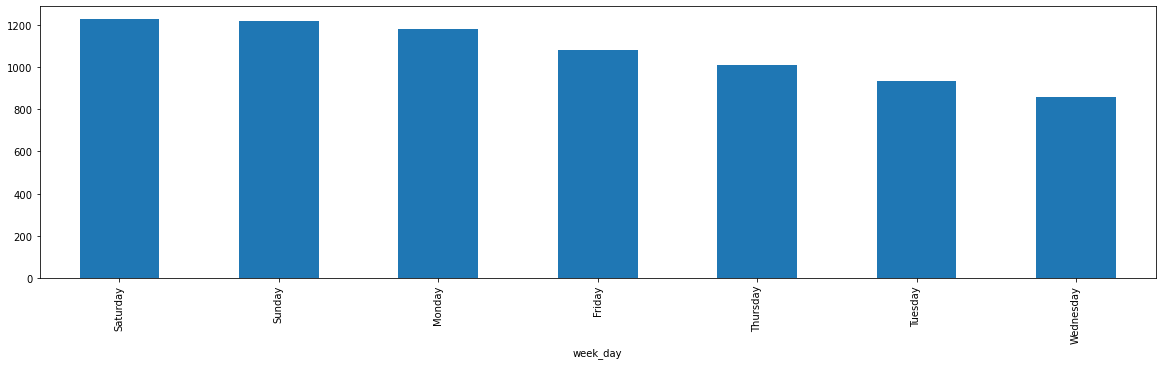

In [61]:
fraud_train.groupby('week_day')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

<font color=lightgreen> Highest fraudulent transactions happens in weekends

<AxesSubplot:xlabel='month_name'>

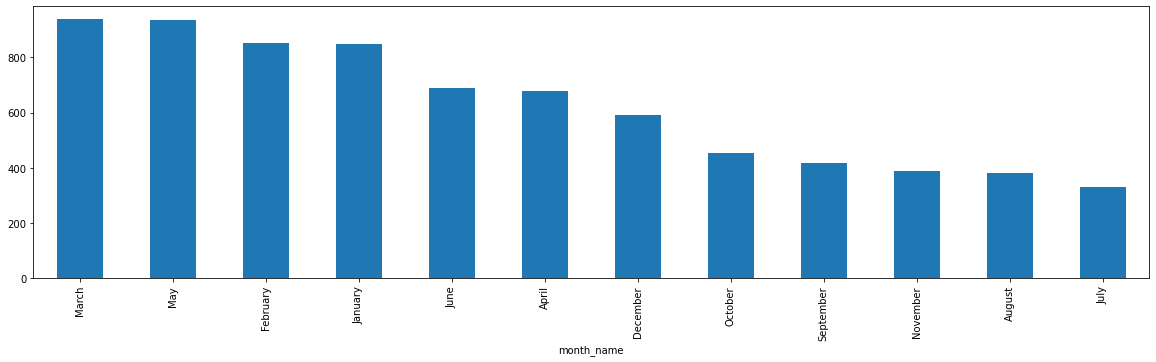

In [62]:
fraud_train.groupby('month_name')['is_fraud'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

<font color=lightgreen> Monthwise fraud transactions

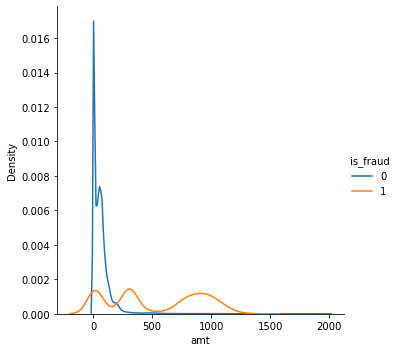

In [63]:
amount = df_train.loc[df_train['amt'] < 2000]
sns.FacetGrid(amount, hue="is_fraud", size=5).map(sns.kdeplot, "amt").add_legend()

<font color=orange> Bivariate Analysis

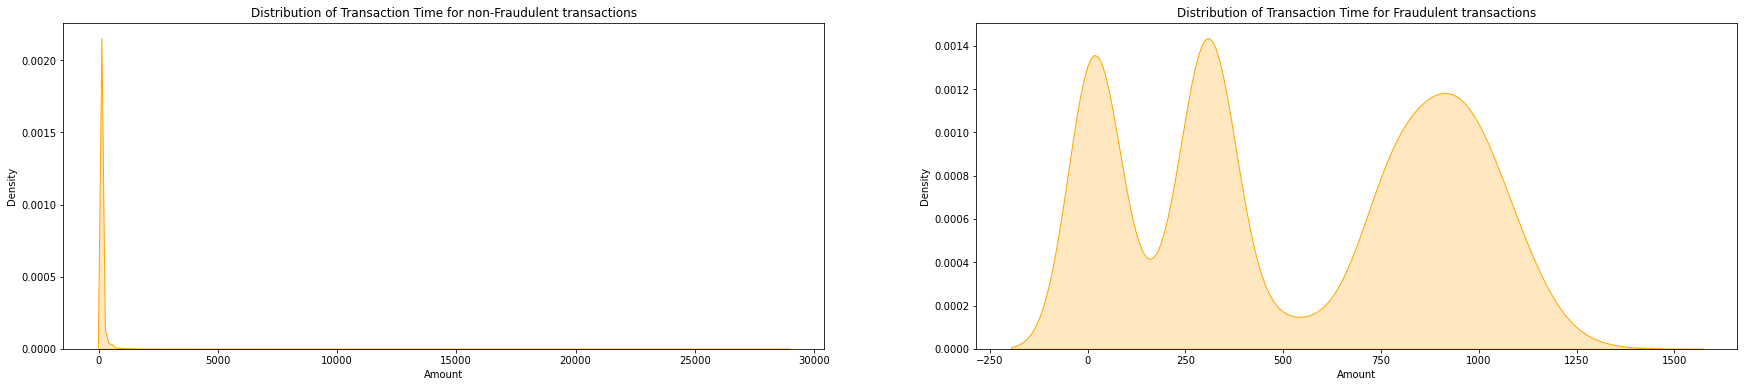

In [64]:
# Distribution of Transaction time for transactions
fig, axes = plt.subplots(ncols = 2, figsize=(30,6))

sns.kdeplot(data=non_fraud_train["amt"], label="Not Fraud", shade=True, color='orange', ax=axes[0])
axes[0].set(xlabel ='Amount', ylabel ='Density')
axes[0].set_title('Distribution of Transaction Time for non-Fraudulent transactions')

sns.kdeplot(data=fraud_train["amt"], label="Fraud", shade=True, color='orange', ax=axes[1])
axes[1].set(xlabel ='Amount', ylabel ='Density')
axes[1].set_title('Distribution of Transaction Time for Fraudulent transactions')

plt.show()

<font color=lightgreen> We can see density distribution of fraud transactions vary a lot compared to genuine transactions

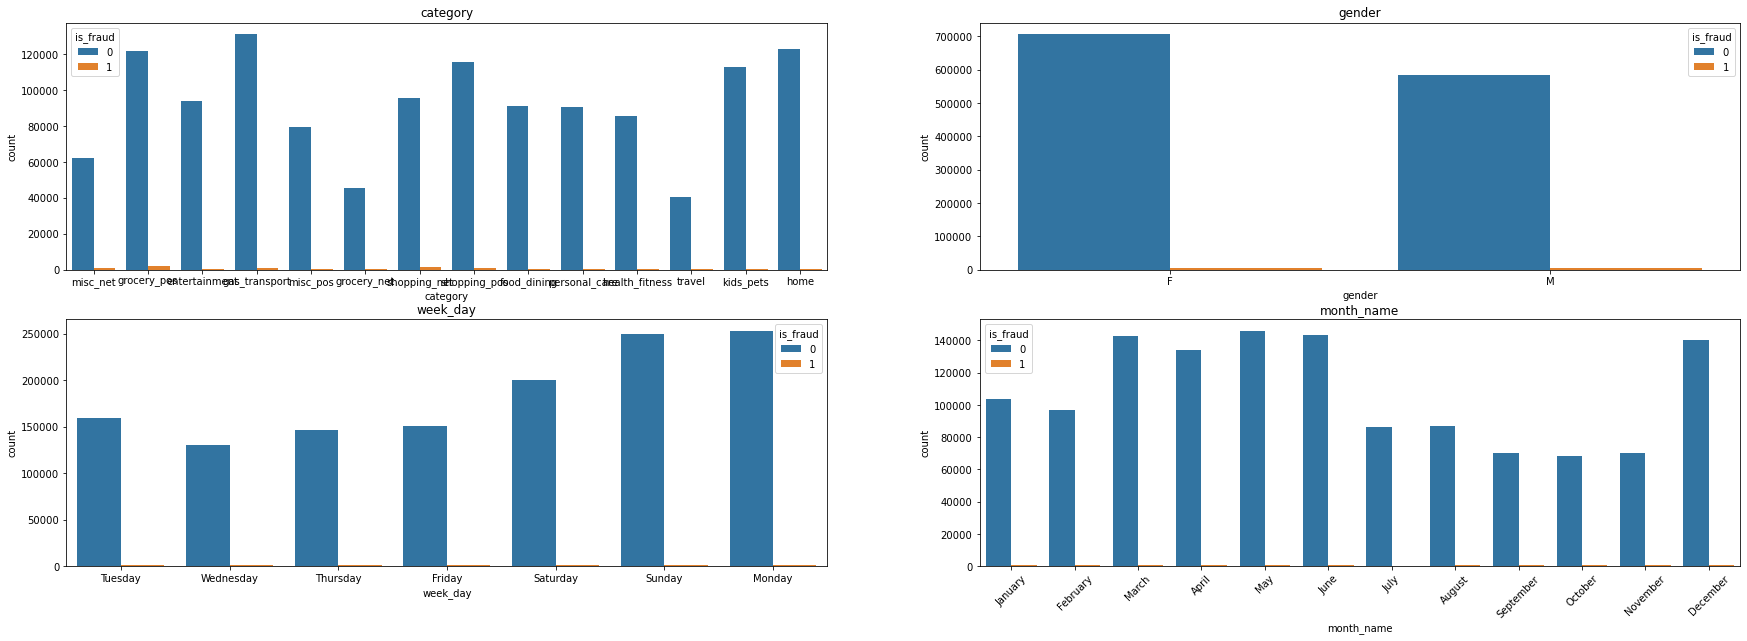

In [65]:
# Category, Gender, Month and Week wise transactions with target variable
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(30,10))

sns.countplot(x="category", hue='is_fraud', data=df_train, ax=axes[0][0])
axes[0][0].set_title('category')
plt.xticks(rotation=45)

sns.countplot(x="gender", hue='is_fraud', data=df_train, ax=axes[0][1])
axes[0][1].set_title('gender')

sns.countplot(x="week_day", hue='is_fraud', data=df_train, ax=axes[1][0])
axes[1][0].set_title('week_day')

sns.countplot(x="month_name", hue='is_fraud', data=df_train, ax=axes[1][1])
axes[1][1].set_title('month_name')

plt.show()

<font color=lightgreen> We can see different areas and daya of both the transactions

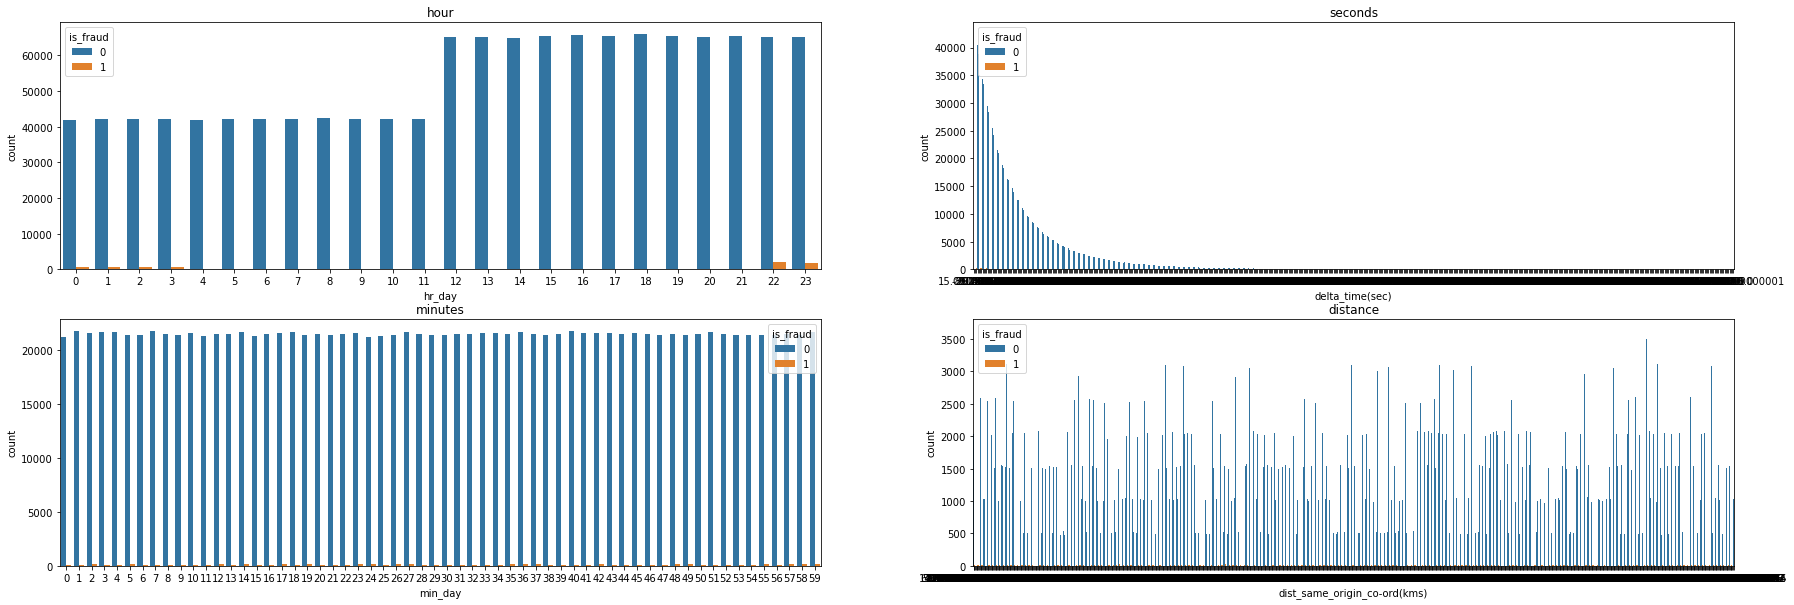

In [66]:
# Category, Gender, Month and Week wise transactions with target variable
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(30,10))

sns.countplot(x="hr_day", hue='is_fraud', data=df_train, ax=axes[0][0])
axes[0][0].set_title('hour')

sns.countplot(x="delta_time(sec)", hue='is_fraud', data=df_train, ax=axes[0][1])
axes[0][1].set_title('seconds')

sns.countplot(x="min_day", hue='is_fraud', data=df_train, ax=axes[1][0])
axes[1][0].set_title('minutes')

sns.countplot(x="dist_same_origin_co-ord(kms)", hue='is_fraud', data=df_train, ax=axes[1][1])
axes[1][1].set_title('distance')

plt.show()

<font color=orange> Time related Analysis

<AxesSubplot:xlabel='unix_time', ylabel='Density'>

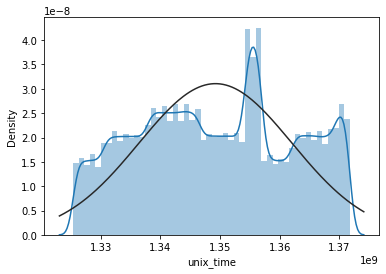

In [67]:
sns.distplot(df_train['unix_time'],fit=stats.norm)

<font color=lightgreen> Unix time distribution of transactions

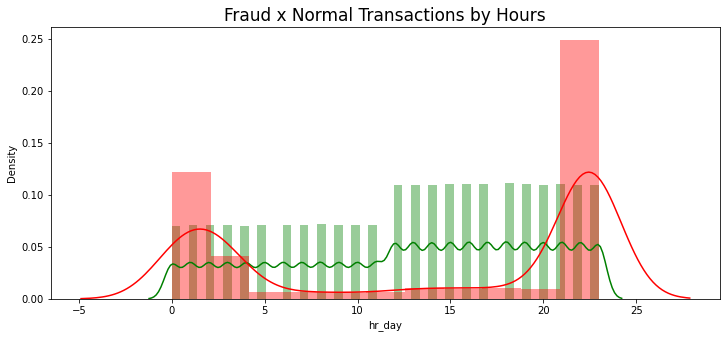

In [68]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train['is_fraud'] == 0]["hr_day"], color='g')
sns.distplot(df_train[df_train['is_fraud'] == 1]["hr_day"], color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.show()

<font color=lightgreen> Time distribution showning fraudulent transactions happening in odd hours.

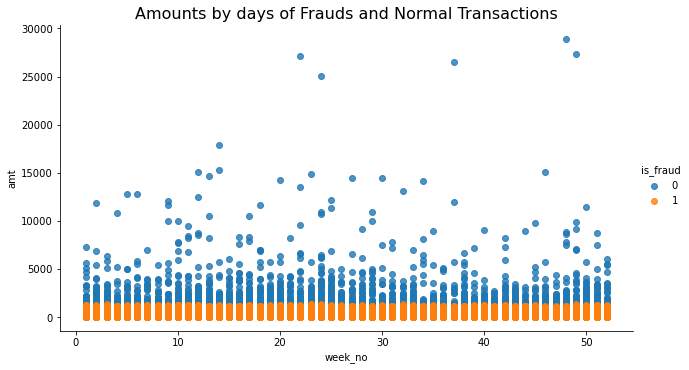

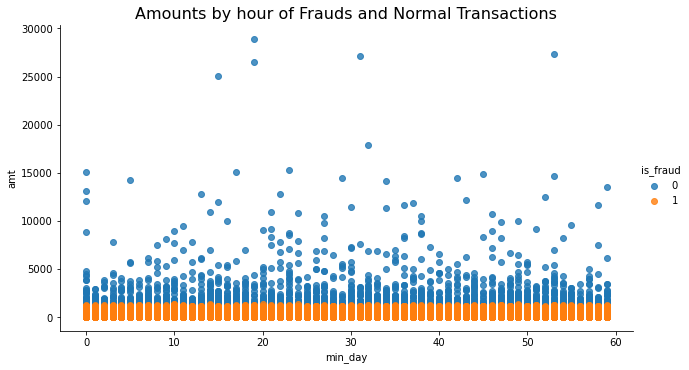

In [69]:
#Looking the Amount and time distribuition of FRAUD transactions

ax = sns.lmplot(y="amt", x="week_no", fit_reg=False,aspect=1.8, data=df_train, hue='is_fraud')
plt.title("Amounts by days of Frauds and Normal Transactions",fontsize=16)

ax = sns.lmplot(y="amt", x="min_day", fit_reg=False,aspect=1.8, data=df_train, hue='is_fraud')
plt.title("Amounts by hour of Frauds and Normal Transactions",fontsize=16)

plt.show()

<AxesSubplot:xlabel='month_name'>

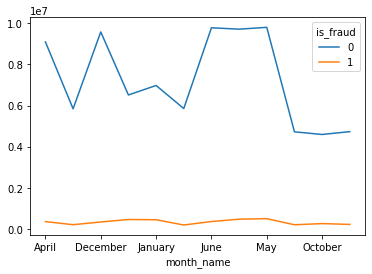

In [70]:
df_train.pivot_table('amt', index='month_name', columns='is_fraud', aggfunc=sum).plot()

<font color=lightgreen> Frequency of genuine transaction is constant but there are variations in fraudulent transactions

<font color=orange> Distance related Analysis

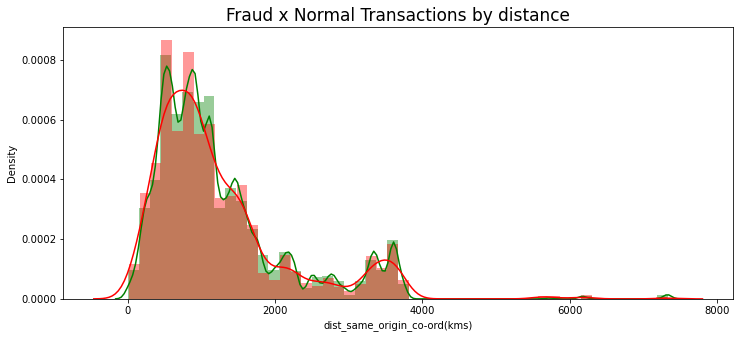

In [71]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train['is_fraud'] == 0]["dist_same_origin_co-ord(kms)"], color='g')
sns.distplot(df_train[df_train['is_fraud'] == 1]["dist_same_origin_co-ord(kms)"], color='r')
plt.title('Fraud x Normal Transactions by distance', fontsize=17)
plt.show()

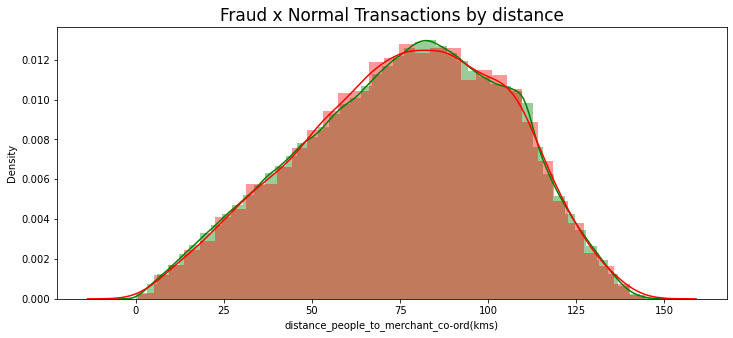

In [72]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train['is_fraud'] == 0]["distance_people_to_merchant_co-ord(kms)"], color='g')
sns.distplot(df_train[df_train['is_fraud'] == 1]["distance_people_to_merchant_co-ord(kms)"], color='r')
plt.title('Fraud x Normal Transactions by distance', fontsize=17)
plt.show()

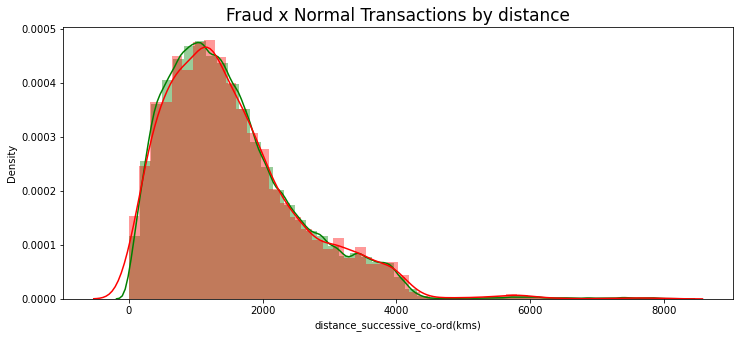

In [73]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train['is_fraud'] == 0]["distance_successive_co-ord(kms)"], color='g')
sns.distplot(df_train[df_train['is_fraud'] == 1]["distance_successive_co-ord(kms)"], color='r')
plt.title('Fraud x Normal Transactions by distance', fontsize=17)
plt.show()

<font color=lightgreen> We can see from all the 3 graphs that distance does not matter much

### <font color=Blue> Outlier Analysis

<font color=orange> Making new dataset for outlier analysis

In [74]:
df_train_outlier = df_train.copy()
df_test_outlier = df_test.copy()

In [75]:
df_train_outlier.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Full_Name,Transaction_Date,age,weekday_no,week_day,week_no,day_no,min_day,hr_day,month_name,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time,delta_time(sec),delta_time_elapsed,delta_time_elapsed(days)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,Jennifer Banks,2019-01-01,31,1,Tuesday,1,1,0,0,January,1,2019,1,0.000000,0.000000,78.597568,0 days 00:00:00,0.0,0 days 00:00:00,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,Stephanie Gill,2019-01-01,41,1,Tuesday,1,1,0,0,January,1,2019,1,3311.583494,3311.583494,30.212176,0 days 00:00:26,26.0,0 days 00:00:26,0


In [76]:
details(df_train_outlier)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
trans_date_trans_time,0,0.0,datetime64[ns],1274791
cc_num,0,0.0,int64,983
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,52928
gender,0,0.0,object,2
street,0,0.0,object,983
city,0,0.0,object,894
state,0,0.0,object,51
zip,0,0.0,int64,970


In [77]:
df_train_outlier[['amt','city_pop','age','weekday_no','week_no','day_no','min_day','hr_day','month','year','year_dayno','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','distance_people_to_merchant_co-ord(kms)','delta_time(sec)','delta_time_elapsed(days)']].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).apply(lambda s: s.apply('{0:.5f}'.format)) 

,amt,city_pop,age,weekday_no,week_no,day_no,min_day,hr_day,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time(sec),delta_time_elapsed(days)
count,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000
mean,70.35104,88824.44056,46.02930,3.07060,24.71640,15.58798,29.49529,12.80486,6.14215,2019.28675,171.31388,1246.03162,1531.79903,76.11465,35.81530,274.97842
std,160.31604,301956.36069,17.38237,2.19815,14.82039,8.82912,17.32018,6.81782,3.41770,0.45225,104.37573,935.54966,1003.25526,29.11693,115.44345,148.78999
min,1.00000,23.00000,14.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,2019.00000,1.00000,0.00000,0.00000,0.02225,-86226.00000,0.00000
1%,1.26000,53.00000,17.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,2019.00000,5.00000,121.17611,106.66625,11.09684,0.00000,7.00000
5%,2.44000,139.00000,22.00000,0.00000,3.00000,2.00000,2.00000,1.00000,1.00000,2019.00000,20.00000,267.63376,293.82902,24.74071,2.00000,38.00000
10%,4.11000,260.00000,25.00000,0.00000,6.00000,3.00000,5.00000,3.00000,2.00000,2019.00000,39.00000,400.60419,440.61927,35.01070,3.00000,70.00000
25%,9.65000,743.00000,33.00000,1.00000,13.00000,8.00000,14.00000,7.00000,3.00000,2019.00000,87.00000,602.07334,800.81469,55.33491,9.00000,153.00000
50%,47.52000,2456.00000,44.00000,3.00000,23.00000,15.00000,30.00000,14.00000,6.00000,2019.00000,155.00000,965.37950,1339.15442,78.23175,22.00000,275.00000
75%,83.14000,20328.00000,57.00000,5.00000,36.00000,23.00000,44.00000,19.00000,9.00000,2020.00000,255.00000,1522.44845,2031.54567,98.50327,47.00000,392.00000


<font color=orange> Plotting boxplot to find outliers

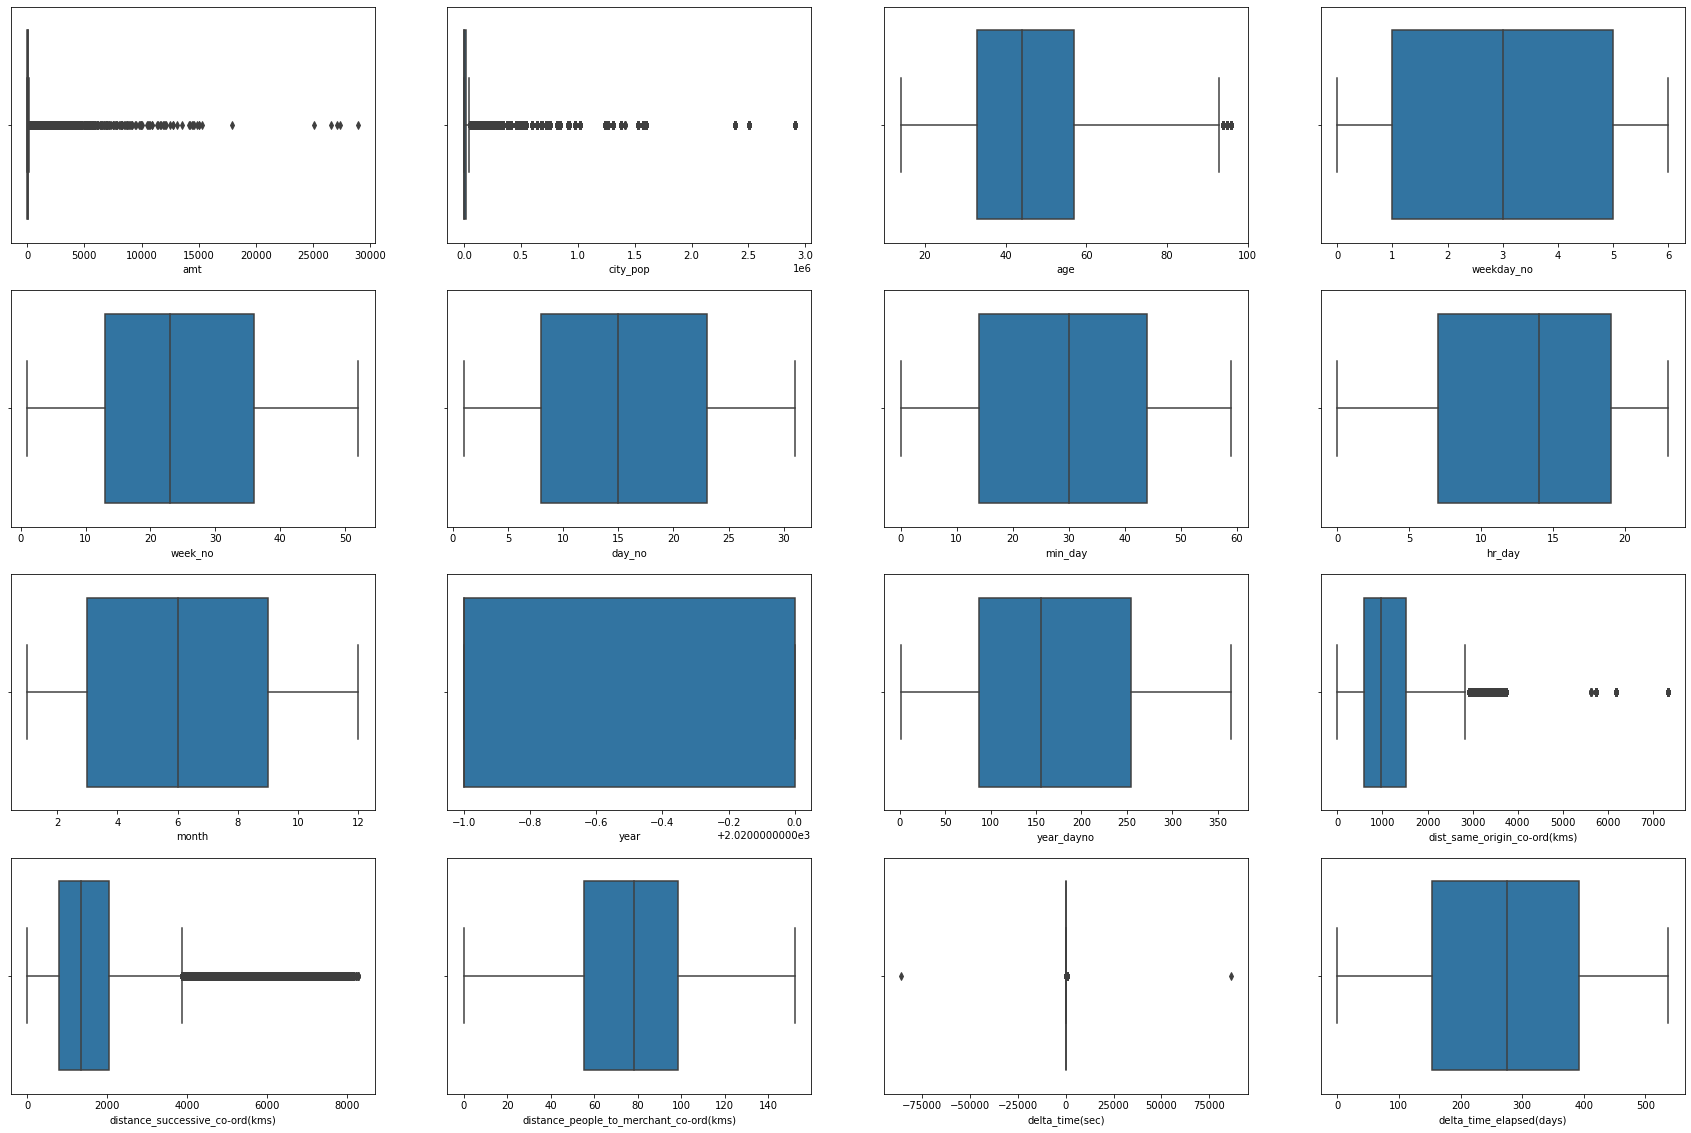

In [78]:
col_data1 = ['amt','city_pop','age','weekday_no','week_no','day_no','min_day','hr_day','month','year','year_dayno','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','distance_people_to_merchant_co-ord(kms)','delta_time(sec)','delta_time_elapsed(days)']

plt.figure(figsize=(30,20))
for i in enumerate(col_data1):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(df_train_outlier[i[1]])

<font color=orange> Treating outliers with Quantile method

In [79]:
col_data_outlier_treatment_1 =  ['amt','age','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','delta_time(sec)']

for i in col_data_outlier_treatment_1:
    q1 = df_train_outlier[i].quantile(0.01)
    q4 = df_train_outlier[i].quantile(0.99)
    df_train_outlier[i][df_train_outlier[i]<=q1]=q1
    df_train_outlier[i][df_train_outlier[i]>=q4]=q4

In [80]:
col_data_outlier_treatment_2 =  ['city_pop']

for i in col_data_outlier_treatment_2:
    q1 = df_train_outlier[i].quantile(0.1)
    q4 = df_train_outlier[i].quantile(0.9)
    df_train_outlier[i][df_train_outlier[i]<=q1]=q1
    df_train_outlier[i][df_train_outlier[i]>=q4]=q4

In [81]:
col_data_outlier_treatment_3 =  ['amt','age','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','delta_time(sec)']

for i in col_data_outlier_treatment_3:
    q1 = df_test_outlier[i].quantile(0.01)
    q4 = df_test_outlier[i].quantile(0.99)
    df_test_outlier[i][df_test_outlier[i]<=q1]=q1
    df_test_outlier[i][df_test_outlier[i]>=q4]=q4

In [82]:
col_data_outlier_treatment_4 =  ['city_pop']

for i in col_data_outlier_treatment_4:
    q1 = df_test_outlier[i].quantile(0.1)
    q4 = df_test_outlier[i].quantile(0.9)
    df_test_outlier[i][df_test_outlier[i]<=q1]=q1
    df_test_outlier[i][df_test_outlier[i]>=q4]=q4

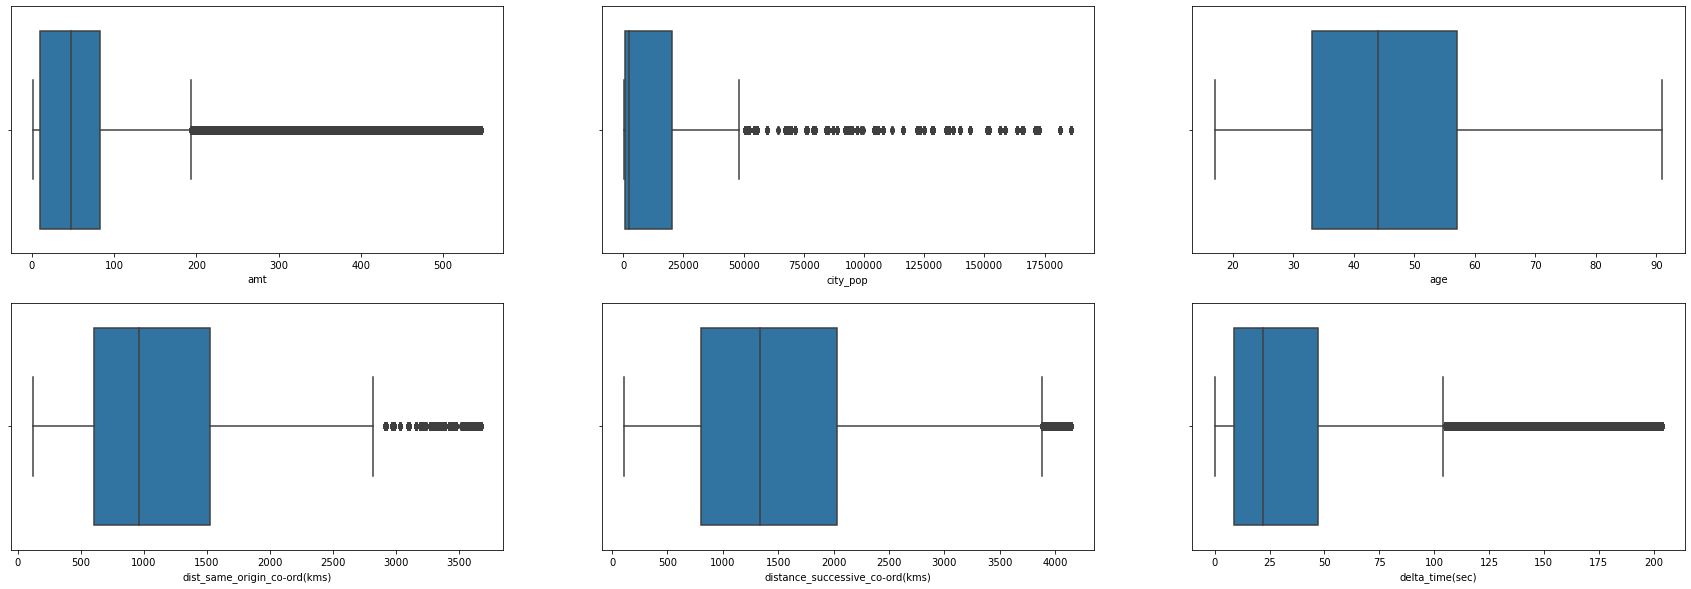

In [83]:
col_data1 = ['amt','city_pop','age','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','delta_time(sec)']

plt.figure(figsize=(30,10))
for i in enumerate(col_data1):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(df_train_outlier[i[1]])

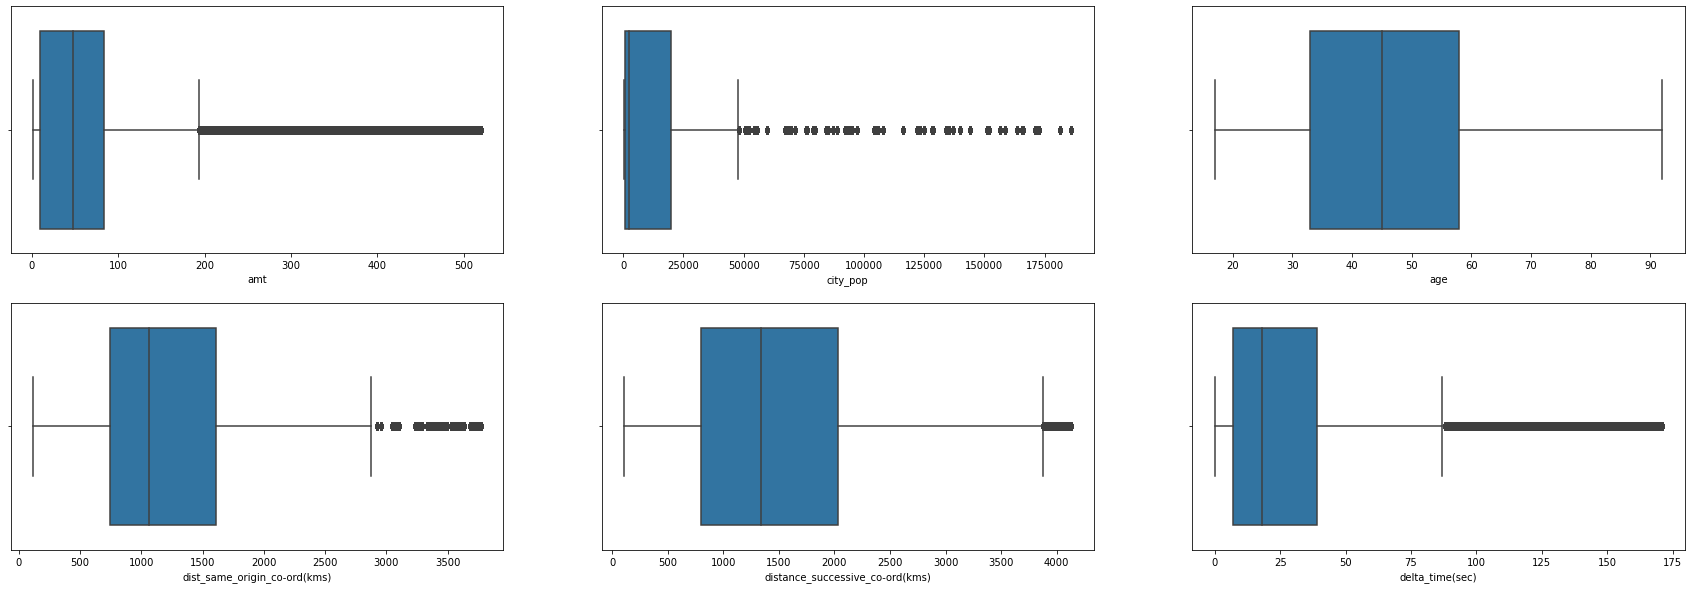

In [84]:
col_data1 = ['amt','city_pop','age','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','delta_time(sec)']

plt.figure(figsize=(30,10))
for i in enumerate(col_data1):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(df_test_outlier[i[1]])

In [85]:
df_train_outlier[['amt','city_pop','age','weekday_no','week_no','day_no','min_day','hr_day','month','year','year_dayno','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','distance_people_to_merchant_co-ord(kms)','delta_time(sec)','delta_time_elapsed(days)']].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).apply(lambda s: s.apply('{0:.5f}'.format)) 

,amt,city_pop,age,weekday_no,week_no,day_no,min_day,hr_day,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time(sec),delta_time_elapsed(days)
count,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000,1296675.00000
mean,65.26063,31837.80975,46.02731,3.07060,24.71640,15.58798,29.49529,12.80486,6.14215,2019.28675,171.31388,1235.21566,1518.15013,76.11465,35.18755,274.97842
std,82.24876,59898.67719,17.30708,2.19815,14.82039,8.82912,17.32018,6.81782,3.41770,0.45225,104.37573,884.49000,946.63357,29.11693,38.98053,148.78999
min,1.26000,260.00000,17.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,2019.00000,1.00000,121.17611,106.66625,0.02225,0.00000,0.00000
1%,1.26000,260.00000,17.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,2019.00000,5.00000,121.17611,106.66625,11.09684,0.00000,7.00000
5%,2.44000,260.00000,22.00000,0.00000,3.00000,2.00000,2.00000,1.00000,1.00000,2019.00000,20.00000,267.63376,293.82902,24.74071,2.00000,38.00000
10%,4.11000,260.00000,25.00000,0.00000,6.00000,3.00000,5.00000,3.00000,2.00000,2019.00000,39.00000,400.60419,440.61927,35.01070,3.00000,70.00000
25%,9.65000,743.00000,33.00000,1.00000,13.00000,8.00000,14.00000,7.00000,3.00000,2019.00000,87.00000,602.07334,800.81469,55.33491,9.00000,153.00000
50%,47.52000,2456.00000,44.00000,3.00000,23.00000,15.00000,30.00000,14.00000,6.00000,2019.00000,155.00000,965.37950,1339.15442,78.23175,22.00000,275.00000
75%,83.14000,20328.00000,57.00000,5.00000,36.00000,23.00000,44.00000,19.00000,9.00000,2020.00000,255.00000,1522.44845,2031.54567,98.50327,47.00000,392.00000


In [86]:
df_test_outlier[['amt','city_pop','age','weekday_no','week_no','day_no','min_day','hr_day','month','year','year_dayno','dist_same_origin_co-ord(kms)','distance_successive_co-ord(kms)','distance_people_to_merchant_co-ord(kms)','delta_time(sec)','delta_time_elapsed(days)']].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).apply(lambda s: s.apply('{0:.5f}'.format)) 

,amt,city_pop,age,weekday_no,week_no,day_no,min_day,hr_day,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time(sec),delta_time_elapsed(days)
count,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000,555719.00000
mean,64.27075,31615.43502,46.63121,2.72678,40.11402,16.46390,29.50202,12.80906,9.50854,2020.00000,275.52492,1337.19840,1514.73665,76.10490,29.55580,102.12198
std,78.91840,59711.18426,17.36232,2.17868,8.60856,8.95531,17.34048,6.81092,1.97821,0.00000,60.19873,888.00528,944.51117,29.11708,32.76752,60.19824
min,1.26000,260.00000,17.00000,0.00000,25.00000,1.00000,0.00000,0.00000,6.00000,2020.00000,173.00000,116.17900,104.79424,0.12388,0.00000,0.00000
1%,1.26000,260.00000,17.00000,0.00000,26.00000,1.00000,0.00000,0.00000,6.00000,2020.00000,174.00000,116.17900,104.79673,11.17856,0.00000,1.00000
5%,2.43000,260.00000,23.00000,0.00000,27.00000,2.00000,3.00000,1.00000,6.00000,2020.00000,182.00000,310.36313,293.82985,24.79712,1.00000,9.00000
10%,4.08000,260.00000,26.00000,0.00000,28.00000,4.00000,5.00000,3.00000,7.00000,2020.00000,192.00000,492.88374,440.13904,34.94188,3.00000,19.00000
25%,9.63000,741.00000,33.00000,1.00000,32.00000,9.00000,14.00000,7.00000,8.00000,2020.00000,222.00000,745.38006,798.57308,55.28626,7.00000,48.00000
50%,47.29000,2408.00000,45.00000,2.00000,40.00000,17.00000,29.00000,14.00000,10.00000,2020.00000,277.00000,1062.63818,1336.16716,78.17952,18.00000,103.00000
75%,83.01000,19685.00000,58.00000,5.00000,49.00000,24.00000,45.00000,19.00000,12.00000,2020.00000,336.00000,1609.86755,2028.93379,98.52076,39.00000,162.00000


<font color=orange> Plotting outliers for other variables wrt target variable

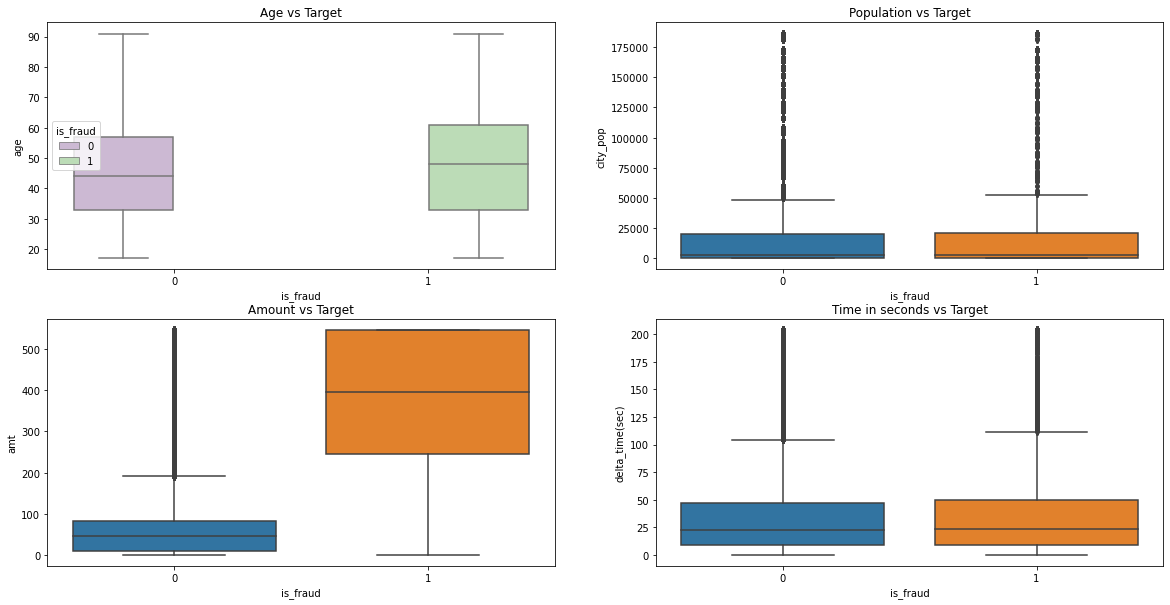

In [87]:
f, axes = plt.subplots(2, 2, figsize=(20,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_fraud", y="age", hue='is_fraud', data=df_train_outlier, palette = 'PRGn', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Target')

sns.boxplot(x="is_fraud", y="city_pop", data=df_train_outlier, ax=axes[0, 1])
axes[0, 1].set_title('Population vs Target')


sns.boxplot(x="is_fraud", y="amt", data=df_train_outlier, ax=axes[1, 0])
axes[1, 0].set_title('Amount vs Target')


sns.boxplot(x="is_fraud", y="delta_time(sec)", data=df_train_outlier, ax=axes[1, 1])
axes[1, 1].set_title('Time in seconds vs Target')

plt.show()

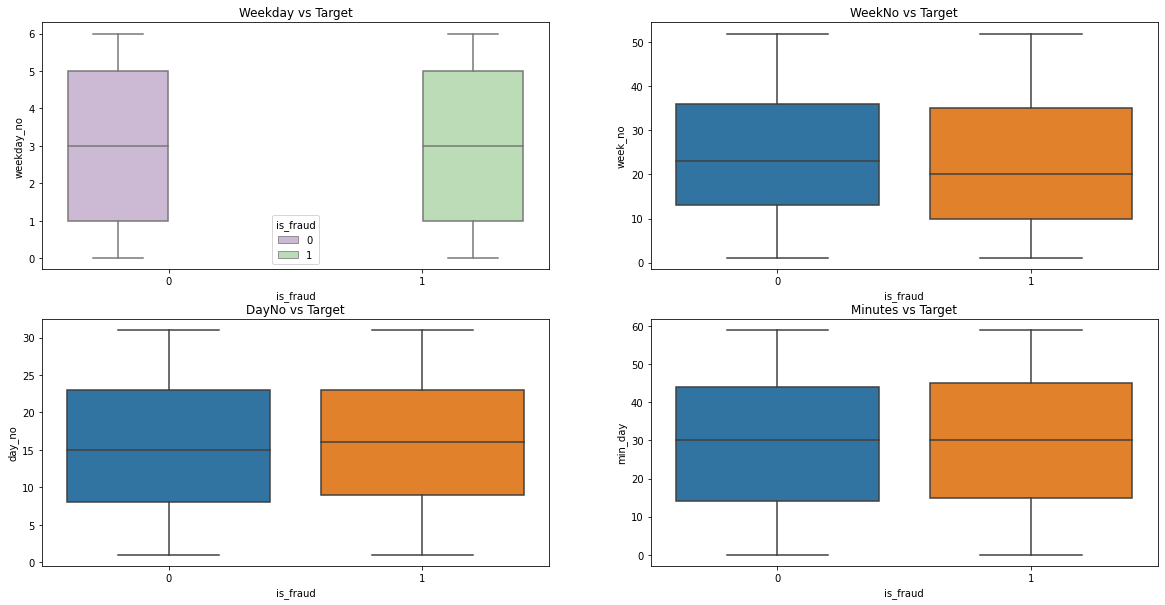

In [88]:
f, axes = plt.subplots(2, 2, figsize=(20,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_fraud", y="weekday_no", hue='is_fraud', data=df_train_outlier, palette = 'PRGn', ax=axes[0, 0])
axes[0, 0].set_title('Weekday vs Target')

sns.boxplot(x="is_fraud", y="week_no", data=df_train_outlier, ax=axes[0, 1])
axes[0, 1].set_title('WeekNo vs Target')


sns.boxplot(x="is_fraud", y="day_no", data=df_train_outlier, ax=axes[1, 0])
axes[1, 0].set_title('DayNo vs Target')


sns.boxplot(x="is_fraud", y="min_day", data=df_train_outlier, ax=axes[1, 1])
axes[1, 1].set_title('Minutes vs Target')

plt.show()

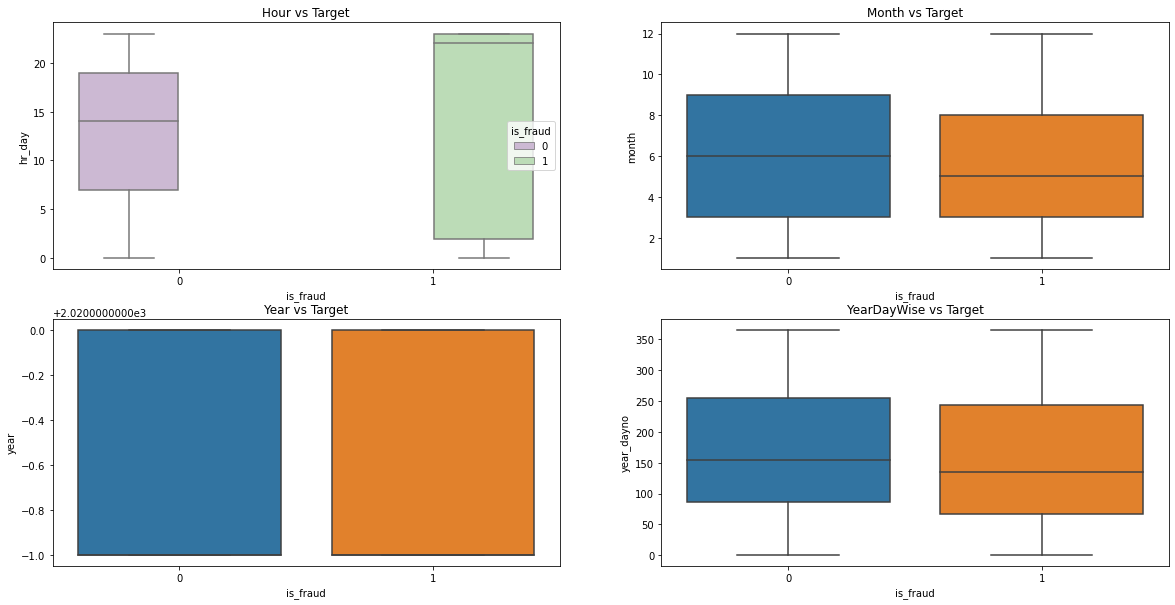

In [89]:
f, axes = plt.subplots(2, 2, figsize=(20,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_fraud", y="hr_day", hue='is_fraud', data=df_train_outlier, palette = 'PRGn', ax=axes[0, 0])
axes[0, 0].set_title('Hour vs Target')

sns.boxplot(x="is_fraud", y="month", data=df_train_outlier, ax=axes[0, 1])
axes[0, 1].set_title('Month vs Target')


sns.boxplot(x="is_fraud", y="year", data=df_train_outlier, ax=axes[1, 0])
axes[1, 0].set_title('Year vs Target')


sns.boxplot(x="is_fraud", y="year_dayno", data=df_train_outlier, ax=axes[1, 1])
axes[1, 1].set_title('YearDayWise vs Target')

plt.show()

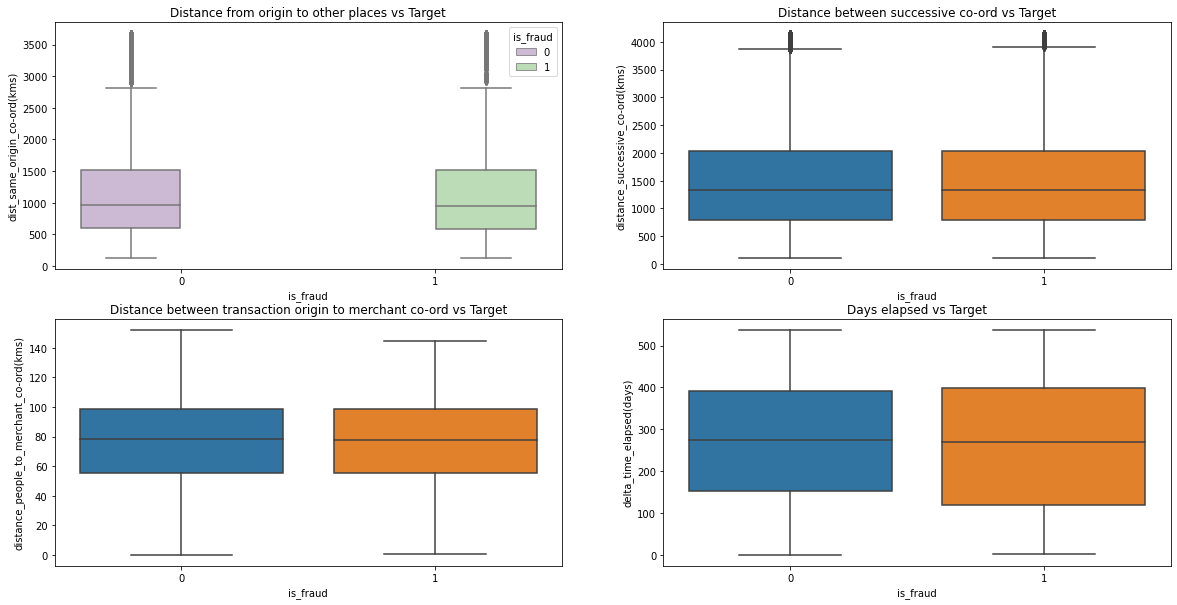

In [90]:
f, axes = plt.subplots(2, 2, figsize=(20,10))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_fraud", y="dist_same_origin_co-ord(kms)", hue='is_fraud', data=df_train_outlier, palette = 'PRGn', ax=axes[0, 0])
axes[0, 0].set_title('Distance from origin to other places vs Target')

sns.boxplot(x="is_fraud", y="distance_successive_co-ord(kms)", data=df_train_outlier, ax=axes[0, 1])
axes[0, 1].set_title('Distance between successive co-ord vs Target')


sns.boxplot(x="is_fraud", y="distance_people_to_merchant_co-ord(kms)", data=df_train_outlier, ax=axes[1, 0])
axes[1, 0].set_title('Distance between transaction origin to merchant co-ord vs Target')


sns.boxplot(x="is_fraud", y="delta_time_elapsed(days)", data=df_train_outlier, ax=axes[1, 1])
axes[1, 1].set_title('Days elapsed vs Target')

plt.show()

<font color=lightgreen> ***Insights:*** <br> Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area. <br> Moveover during sampling the problem might again surface. <br> Hence ignoring outlier treatment.

### <font color=Blue> Preparation for Modelling with original data

In [91]:
df_train_model = df_train.copy()
df_test_model = df_test.copy()

In [92]:
df_train_model.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Full_Name,Transaction_Date,age,weekday_no,week_day,week_no,day_no,min_day,hr_day,month_name,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time,delta_time(sec),delta_time_elapsed,delta_time_elapsed(days)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1970-01-01 00:00:01.325376018,36.011293,-82.048315,0,Jennifer Banks,2019-01-01,31,1,Tuesday,1,1,0,0,January,1,2019,1,0.000000,0.000000,78.597568,0 days 00:00:00,0.0,0 days 00:00:00,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1970-01-01 00:00:01.325376044,49.159047,-118.186462,0,Stephanie Gill,2019-01-01,41,1,Tuesday,1,1,0,0,January,1,2019,1,3311.583494,3311.583494,30.212176,0 days 00:00:26,26.0,0 days 00:00:26,0


In [93]:
df_test_model.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,Full_Name,Transaction_Date,age,weekday_no,week_day,week_no,day_no,min_day,hr_day,month_name,month,year,year_dayno,dist_same_origin_co-ord(kms),distance_successive_co-ord(kms),distance_people_to_merchant_co-ord(kms),delta_time,delta_time(sec),delta_time_elapsed,delta_time_elapsed(days)
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1970-01-01 00:00:01.371816865,33.986391,-81.200714,0,Jeff Elliott,2020-06-21,52,6,Sunday,25,21,14,12,June,6,2020,173,0.000000,0.000000,24.561462,0 days 00:00:00,0.0,0 days 00:00:00,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1970-01-01 00:00:01.371816873,39.450498,-109.960431,0,Joanne Williams,2020-06-21,30,6,Sunday,25,21,14,12,June,6,2020,173,2694.747922,2694.747922,104.925092,0 days 00:00:08,8.0,0 days 00:00:08,0


In [94]:
df_train_model.shape, df_test_model.shape

((1296675, 39), (555719, 39))

<font color=orange> Dropping most correlated variables

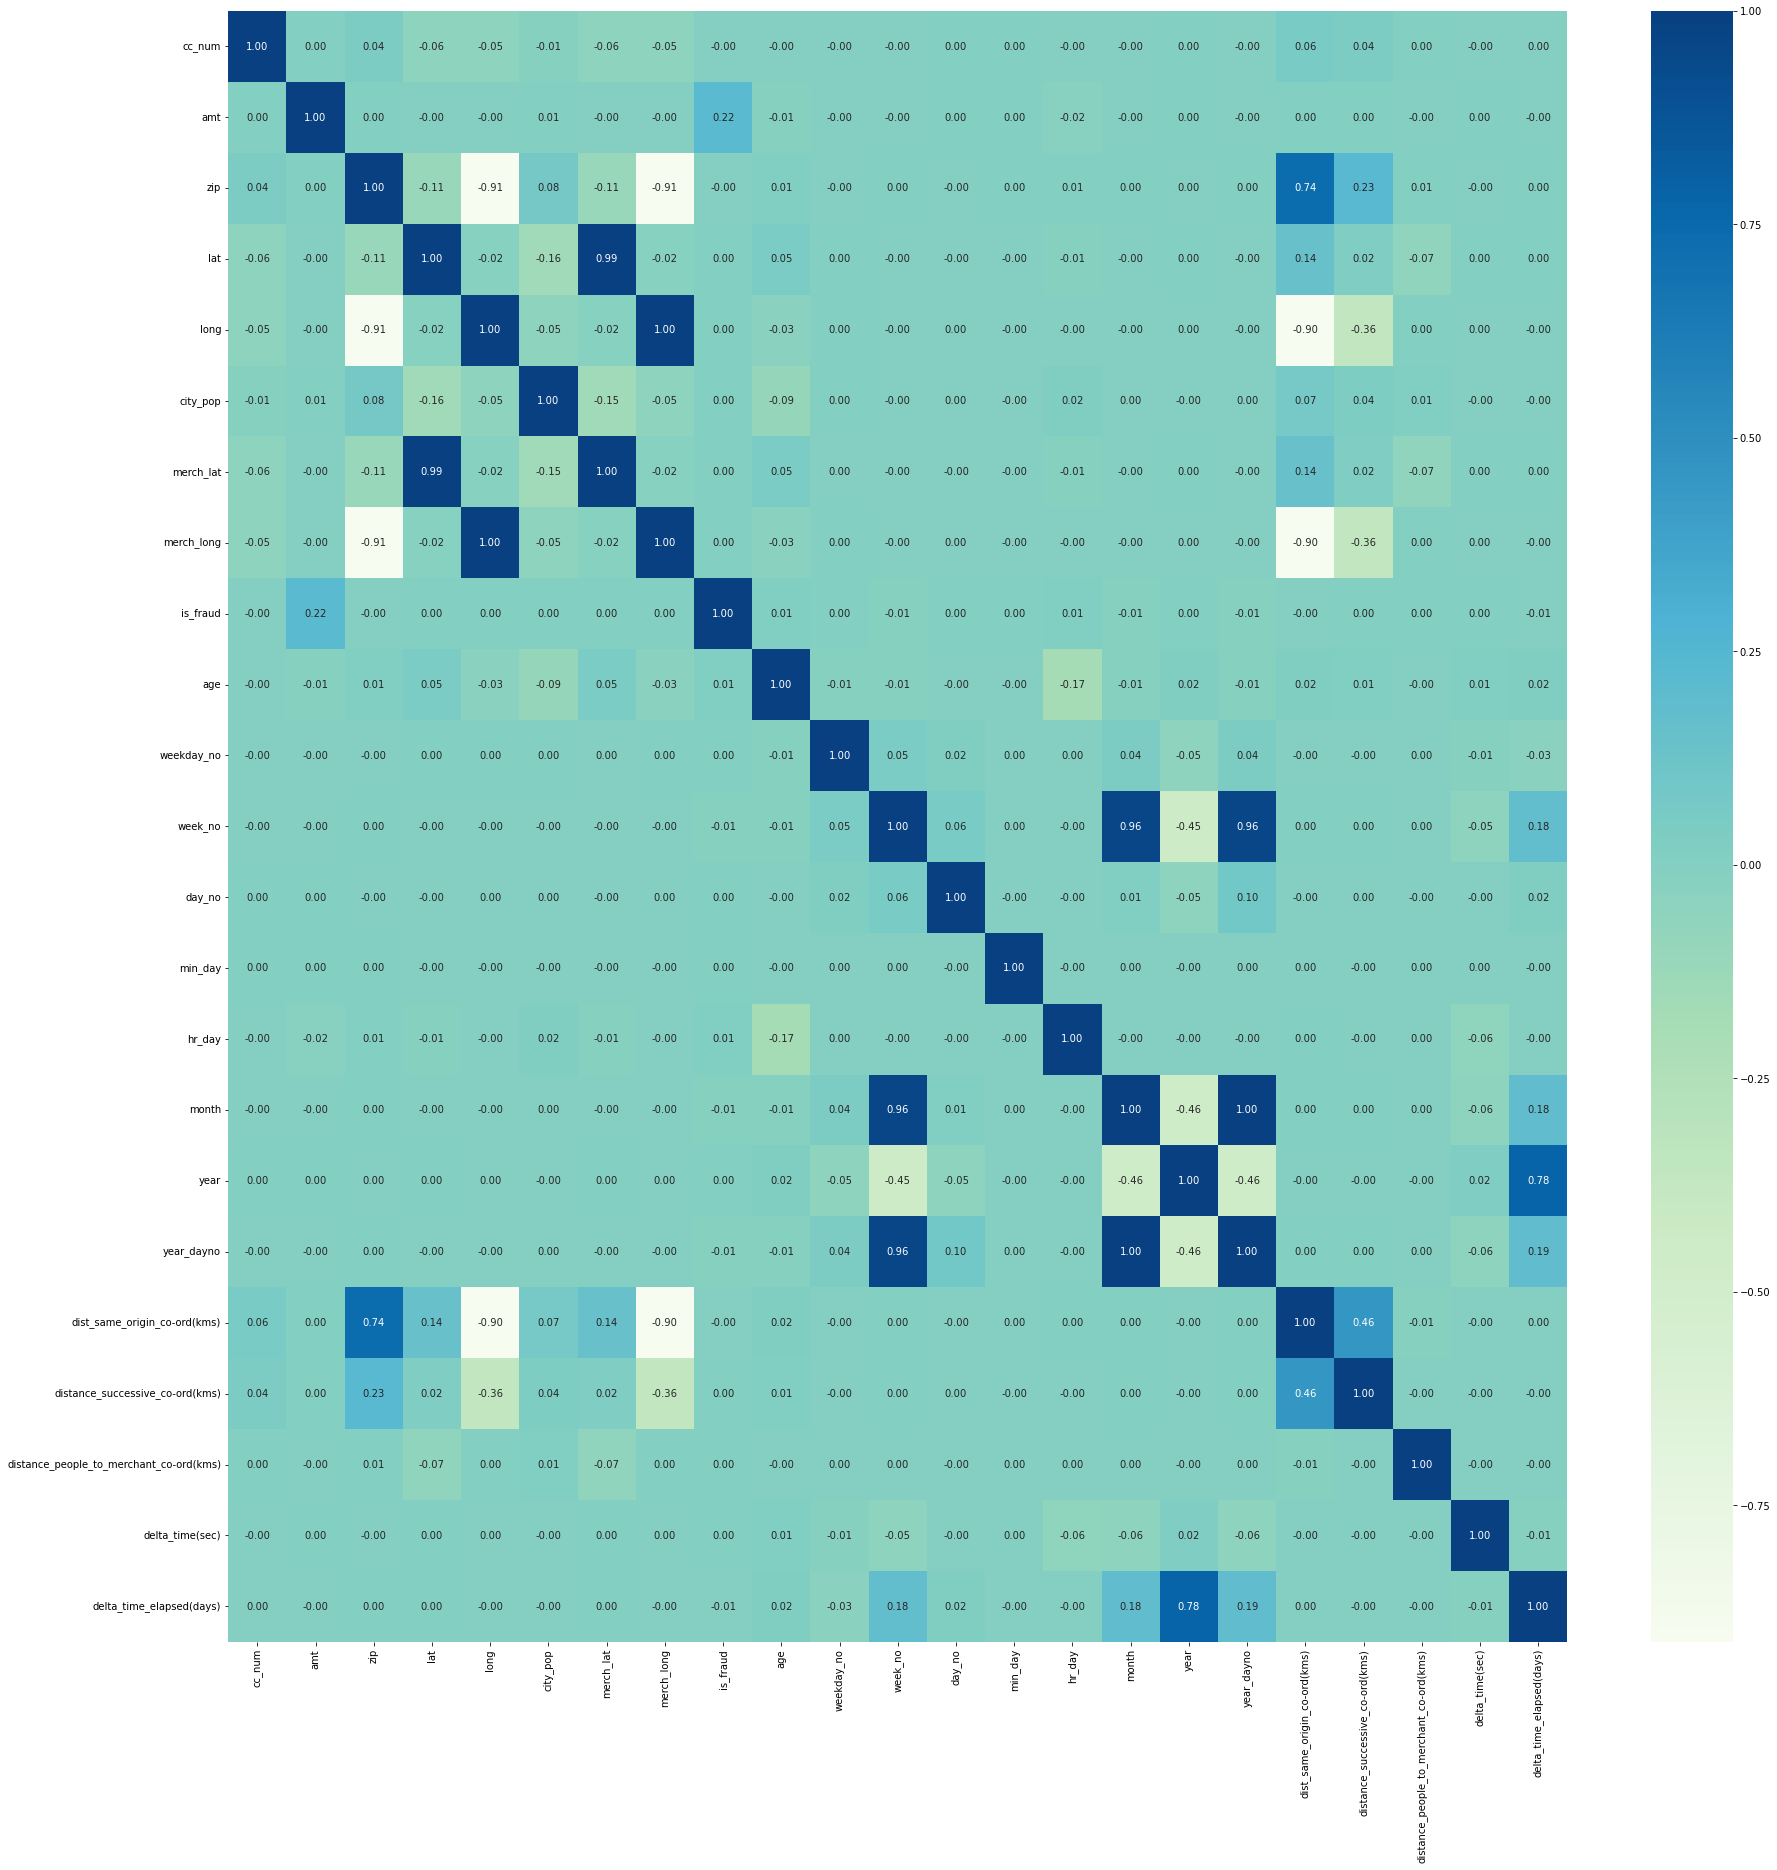

In [95]:
plt.figure(figsize = (30,30))
sns.heatmap(df_train_model.corr(),annot = True, cmap="GnBu",fmt='.2f')
plt.show()

In [96]:
corr_matrix1 = df_train_model.corr().abs()

# Select upper triangle of correlation matrix
upper1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.75)]
to_drop1

['long',
 'merch_lat',
 'merch_long',
 'month',
 'year_dayno',
 'dist_same_origin_co-ord(kms)',
 'delta_time_elapsed(days)']

In [97]:
corr_matrix2 = df_test_model.corr().abs()

# Select upper triangle of correlation matrix
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.75)]
to_drop2

['long',
 'merch_lat',
 'merch_long',
 'month',
 'year_dayno',
 'dist_same_origin_co-ord(kms)',
 'delta_time_elapsed(days)']

In [98]:
df_train_model.drop(to_drop1, axis=1, inplace=True)
df_test_model.drop(to_drop2, axis=1, inplace=True)

<font color=orange> Dropping redundant columns

In [99]:
df_train_model.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'city_pop', 'job', 'trans_num', 'unix_time', 'is_fraud', 'Full_Name', 'Transaction_Date', 'age', 'weekday_no', 'week_day', 'week_no', 'day_no', 'min_day', 'hr_day', 'month_name', 'year', 'distance_successive_co-ord(kms)', 'distance_people_to_merchant_co-ord(kms)', 'delta_time', 'delta_time(sec)', 'delta_time_elapsed'], dtype='object')

In [100]:
df_train_model.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'job', 'trans_num', 'unix_time', 'Full_Name', 'Transaction_Date', 'week_day', 'month_name', 'year', 'delta_time', 'delta_time_elapsed'],1,inplace=True)
df_test_model.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'street', 'city', 'state', 'zip', 'lat', 'job', 'trans_num', 'unix_time', 'Full_Name', 'Transaction_Date', 'week_day', 'month_name', 'year', 'delta_time', 'delta_time_elapsed'],1,inplace=True)

In [101]:
# %%time
# sns.pairplot(df_train_model, hue='is_fraud')
# plt.show()

# Google colab is crashing

In [102]:
df_train_model.shape, df_test_model.shape

((1296675, 14), (555719, 14))

<font color=orange> Splitting into X , y, X_test, y_test before validation split

In [103]:
X = df_train_model.drop(['is_fraud'], 1)
y = df_train_model['is_fraud']
X_test = df_test_model.drop(['is_fraud'], 1)
y_test = df_test_model['is_fraud']

In [104]:
# Not requried

# year = [2019, 2020]
# ordi = OrdinalEncoder(categories=[year])

# # For train data
# X['year'] = pd.DataFrame(ordi.fit_transform(X[['year']]))

# # For test data
# X_test['year'] = pd.DataFrame(ordi.transform(X_test[['year']]))

<font color=orange> One hot encoding for gender and category columns

In [105]:
ohe = OneHotEncoder(sparse=False)

# For train data
ohe_df1 = pd.DataFrame(ohe.fit_transform(X[['category','gender']]),columns=ohe.get_feature_names())

# For test data
ohe_df2 = pd.DataFrame(ohe.transform(X_test[['category','gender']]),columns=ohe.get_feature_names())

In [106]:
# For train data
X = pd.concat([X, ohe_df1],1)

# For test data
X_test = pd.concat([X_test, ohe_df2],1)

<font color=orange> Merging the data

In [107]:
# For train data
X.drop(['category','gender'],1, inplace=True)

# For test data
X_test.drop(['category','gender'],1, inplace=True)

<font color=orange> Distribution plot/skewed

In [108]:
Xplot = pd.concat([X, y], 1)

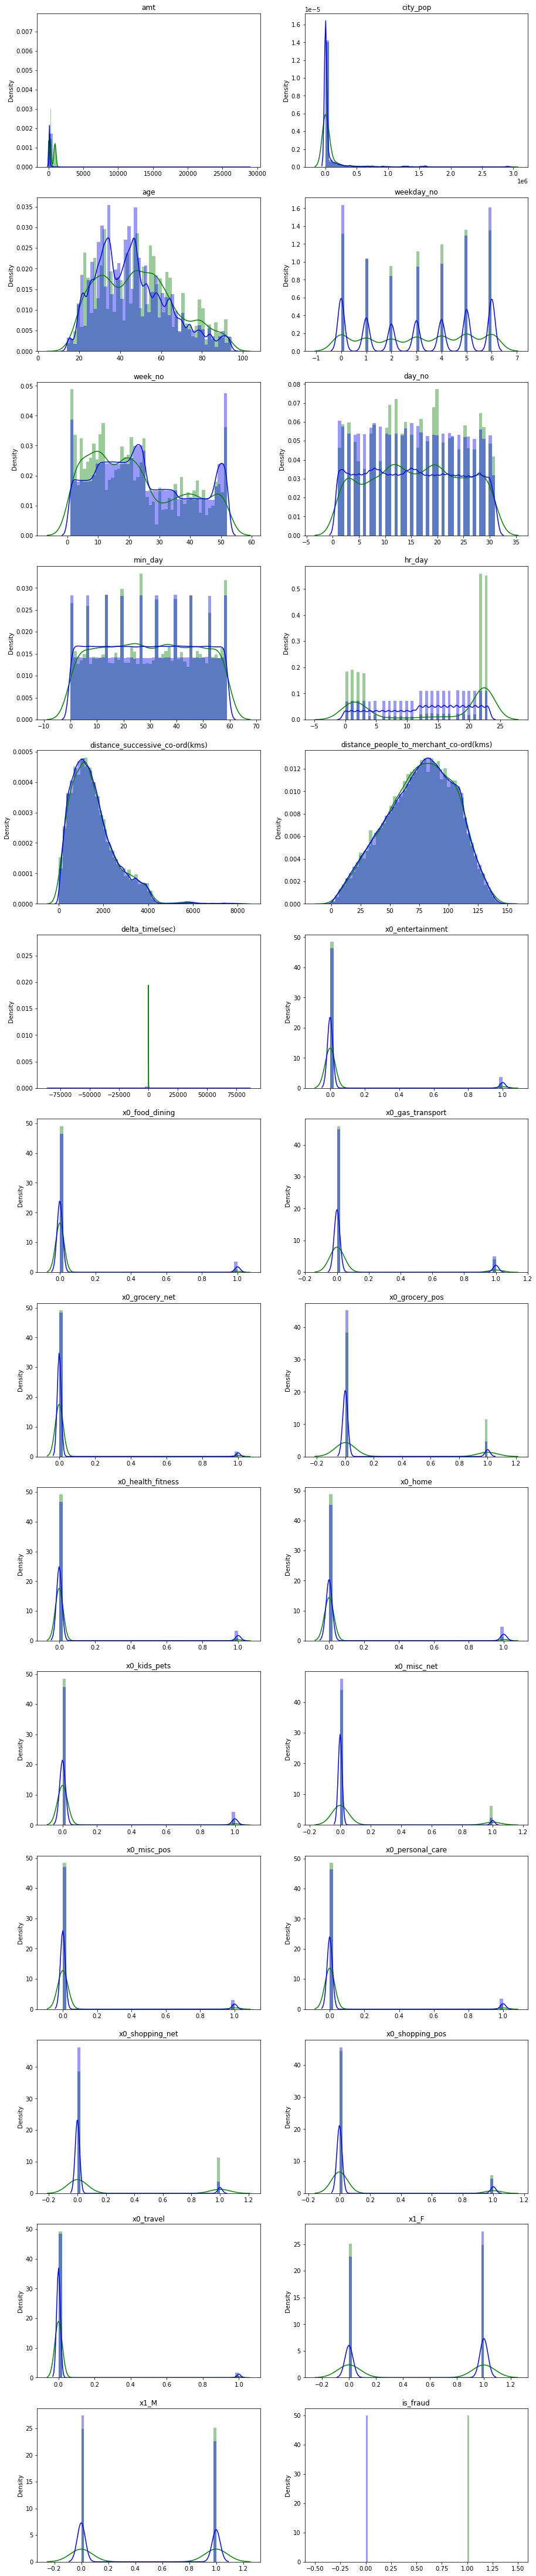

In [109]:
columns = Xplot.columns

frauds = Xplot.is_fraud == 1
normals = Xplot.is_fraud == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(Xplot[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(Xplot[col][frauds], bins = 50, color='g') 
    sns.distplot(Xplot[col][normals], bins = 50, color='b') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

<font color=lightgreen> The model is skewed and hence scaling with power transformer has to be performed to reduce skewness.

### <font color=Blue> Modelling with Training and Validation set

<font color=orange> Train Validation Split

In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=23, stratify=y)

In [111]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((778005, 27), (778005,), (555719, 27), (555719,), (518670, 27), (518670,))

In [112]:
details(X_train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
amt,0,0.0,float64,43309
city_pop,0,0.0,int64,879
age,0,0.0,int64,83
weekday_no,0,0.0,int64,7
week_no,0,0.0,int64,52
day_no,0,0.0,int64,31
min_day,0,0.0,int64,60
hr_day,0,0.0,int64,24
distance_successive_co-ord(kms),0,0.0,float64,289673
distance_people_to_merchant_co-ord(kms),0,0.0,float64,778005


In [113]:
details(X_valid)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
amt,0,0.0,float64,37185
city_pop,0,0.0,int64,879
age,0,0.0,int64,83
weekday_no,0,0.0,int64,7
week_no,0,0.0,int64,52
day_no,0,0.0,int64,31
min_day,0,0.0,int64,60
hr_day,0,0.0,int64,24
distance_successive_co-ord(kms),0,0.0,float64,245574
distance_people_to_merchant_co-ord(kms),0,0.0,float64,518670


In [114]:
details(X_test)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
amt,0,0.0,float64,37256
city_pop,0,0.0,int64,835
age,0,0.0,int64,81
weekday_no,0,0.0,int64,7
week_no,0,0.0,int64,29
day_no,0,0.0,int64,31
min_day,0,0.0,int64,60
hr_day,0,0.0,int64,24
distance_successive_co-ord(kms),0,0.0,float64,253382
distance_people_to_merchant_co-ord(kms),0,0.0,float64,555719


<font color=orange> Scaling using Power transformer to get rid of skewness

In [115]:
pt = PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.transform(X_valid)
pt.transform(X_test)
#Not the right way, follow according to AV_FEB_22_Jobathon

array([[-1.60251096,  1.60381334,  0.47481124, ..., -0.17980097,
        -1.10001558,  1.10001558],
       [-0.14319719, -1.17256949, -0.92891975, ..., -0.17980097,
         0.90907803, -0.90907803],
       [ 0.10510101,  0.92609716,  0.36900986, ..., -0.17980097,
         0.90907803, -0.90907803],
       ...,
       [ 0.71088805,  0.06980143, -0.28062551, ..., -0.17980097,
         0.90907803, -0.90907803],
       [-1.0439227 , -1.67711086,  0.62768483, ...,  5.56170517,
        -1.10001558,  1.10001558],
       [ 0.04346564,  1.30935112, -1.17864813, ..., -0.17980097,
        -1.10001558,  1.10001558]])

<font color=orange> Resampling just in Train set excluding Test set (or validation set (check))

In [116]:
#Performed only on imbalanced dataset
smt = SMOTE(sampling_strategy='minority', random_state=23)
ada = ADASYN(sampling_strategy='minority', random_state=23)

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [117]:
X_train_smt.shape, y_train_smt.shape, X_train_ada.shape, y_train_ada.shape

((1547002, 27), (1547002,), (1546595, 27), (1546595,))

<font color=orange> Modelling Parameters

In [118]:
# Models
model = list()
# Balancing imbalanced data
resample = list()
# Precision
precision = list()
# Recall
recall = list()
# F1-Score
F1score = list()
# Area under ROC Curve
AUCROC = list()
# Area under Precision-Recall Curve
AUCPR = list()

In [119]:
# Decision Tree
model_DT = DecisionTreeClassifier(random_state = 23)

# Random Forest
model_RF = RandomForestClassifier(oob_score = True, random_state=23)


In [120]:
# Hyperparameter Tuning

params_DT = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 


# Not able to run hyperparameters for Random Forest because of crashing, hence choosing limited parameters
params_RF = {    
    'n_estimators': [50],
    'max_depth': [50],
    'min_samples_leaf': [200],
    'min_samples_split' : [100],
    'criterion': ["gini"]
}

# params_XGB = {
#     'n_estimators': [20, 50, 100, 200, 500],
#     'max_depth': [1, 2, 5, 10, 20, 50, 100],
#     'sampling_method': ['uniform','gradient_based']
# }
# Not able to run hyperparameters for XGB because of crashing

<font color=orange> Function for training model and performing test on validation set

In [121]:
def model_fit_evaluation(model_model, params, X_train, y_train, X_test, y_test, algo=None, sampling=None):
    
    rcv = RandomizedSearchCV(model_model, params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)
    
    print('\n')
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    # Test set prediction
    y_test_prob=(rcv.best_estimator_).predict_proba(X_test)
    y_test_pred=(rcv.best_estimator_).predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test, y_test_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test, y_test_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_test_prob[:,1]),'\n')
    print('AUC-PR')
    print('='*60)
    print(average_precision_score(y_test, y_test_prob[:,1]),'\n')
    print('Roc-Auc-Curve')
    print('='*60)
    print(plot_roc_curve((rcv.best_estimator_), X_test, y_test),'\n')
    print('Precision-Recall-Curve')
    print('='*60)
    print(plot_precision_recall_curve((rcv.best_estimator_), X_test, y_test),'\n')
    
    model.append(algo)
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    F1score.append(f1_score(y_test, y_test_pred))
    AUCROC.append(roc_auc_score(y_test, y_test_prob[:,1]))
    resample.append(sampling)
    AUCPR.append(average_precision_score(y_test, y_test_prob[:,1]))  

<font color=orange> Decision Tree without sampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=200,
                       random_state=23)
best parameters:  {'min_samples_split': 200, 'min_samples_leaf': 50, 'max_depth': 10, 'criterion': 'gini'}
best score:  0.9860514183470656


Confusion Matrix
[[515437    231]
 [   746   2256]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    515668
           1       0.91      0.75      0.82      3002

    accuracy                           1.00    518670
   macro avg       0.95      0.88      0.91    518670
weighted avg       1.00      1.00      1.00    518670
 

AUC-ROC
0.9879506435891848 

AUC-PR
0.8844143535100333 

Roc-Auc-Curve

Precision-Recall-Curve



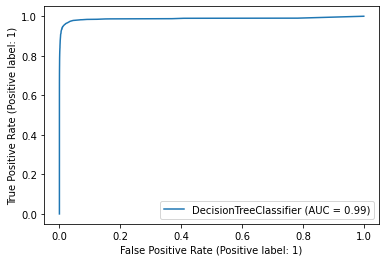

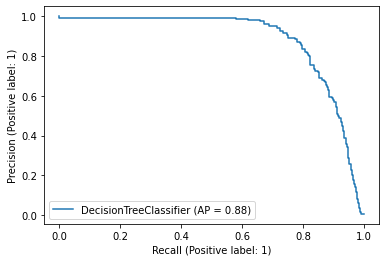

In [122]:
model_fit_evaluation(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'actual')

<font color=orange> Decision Tree with Smote

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(max_depth=100, min_samples_leaf=200,
                       min_samples_split=50, random_state=23)
best parameters:  {'min_samples_split': 50, 'min_samples_leaf': 200, 'max_depth': 100, 'criterion': 'gini'}
best score:  0.9996449967886971


Confusion Matrix
[[512044   3624]
 [   322   2680]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    515668
           1       0.43      0.89      0.58      3002

    accuracy                           0.99    518670
   macro avg       0.71      0.94      0.79    518670
weighted avg       1.00      0.99      0.99    518670
 

AUC-ROC
0.9869579427352296 

AUC-PR
0.8345789579875553 

Roc-Auc-Curve

Precision-Recall-Curve



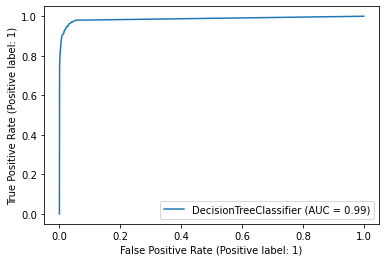

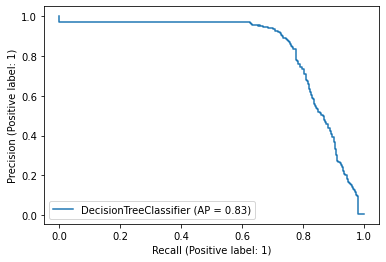

In [123]:
model_fit_evaluation(model_DT, params_DT, X_train_smt, y_train_smt, X_valid, y_valid, 'Decision Tree', 'Smote')

<font color=orange> Decision Tree with Adasyn

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=200,
                       min_samples_split=20, random_state=23)
best parameters:  {'min_samples_split': 20, 'min_samples_leaf': 200, 'max_depth': 100, 'criterion': 'entropy'}
best score:  0.9991034595889927


Confusion Matrix
[[511697   3971]
 [   292   2710]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    515668
           1       0.41      0.90      0.56      3002

    accuracy                           0.99    518670
   macro avg       0.70      0.95      0.78    518670
weighted avg       1.00      0.99      0.99    518670
 

AUC-ROC
0.9855231909254041 

AUC-PR
0.8463706033948725 

Roc-Auc-Curve

Precision-Recall-Curve



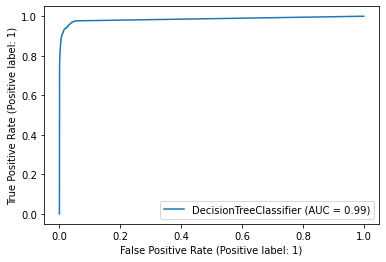

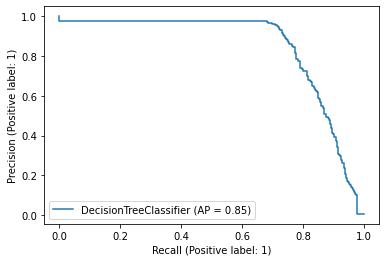

In [124]:
model_fit_evaluation(model_DT, params_DT, X_train_ada, y_train_ada, X_valid, y_valid, 'Decision Tree', 'adasyn')

<font color=orange> Random Forest without Sampling

Fitting 5 folds for each of 1 candidates, totalling 5 fits


best estimator :  RandomForestClassifier(max_depth=50, min_samples_leaf=200,
                       min_samples_split=100, n_estimators=50, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 50, 'min_samples_split': 100, 'min_samples_leaf': 200, 'max_depth': 50, 'criterion': 'gini'}
best score:  0.9873235513201196


Confusion Matrix
[[515631     37]
 [  1533   1469]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    515668
           1       0.98      0.49      0.65      3002

    accuracy                           1.00    518670
   macro avg       0.99      0.74      0.83    518670
weighted avg       1.00      1.00      1.00    518670
 

AUC-ROC
0.9904135030674778 

AUC-PR
0.7813414731108826 

Roc-Auc-Curve

Precision-Recall-Curve



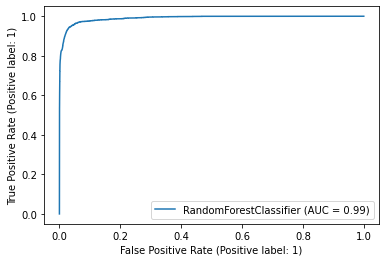

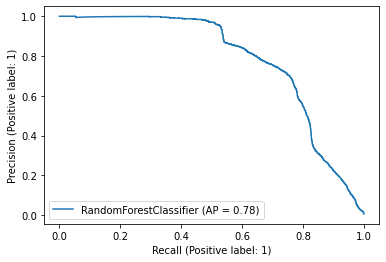

In [125]:
model_fit_evaluation(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'actual')

<font color=orange> Random Forest with Smote

In [ ]:
model_fit_evaluation(model_RF, params_RF, X_train_smt, y_train_smt, X_valid, y_valid, 'Random Forest', 'smote')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


<font color=orange> Random Forest with Adasyn

In [ ]:
model_fit_evaluation(model_RF, params_RF, X_train_ada, y_train_ada, X_valid, y_valid, 'Random Forest', 'adasyn')

<font color=orange> Model Comparision

In [ ]:
eval_df = pd.DataFrame({'model': model, 'resample': resample, 'precision': precision, 'recall':recall, 'F1score':F1score, 'AUCROC':AUCROC, 'AUCPR':AUCPR})
eval_df

### <font color=Blue> Running Trained Algorithm on Test set and Analysis

<font color=orange> Running on Test Set

Using the best parameters from above table, i.e; Random forest with Adasyn and Decision tree with smote sampling gives better precision and recall score along with better F1-score and good auc scores. Let's run both training algorithm on test data.

<font color=orange> Taking whole training data (before split to validation)

In [ ]:
X.shape, y.shape, X_test.shape, y_test.shape

In [ ]:
pt = PowerTransformer(copy=False)
pt.fit_transform(X)

In [ ]:
details(X)

<font color=orange> For Decision Tree Smote gave best estimators and metrics and for Random forest Adasyn provided best estimators and metrics

In [ ]:
smk = SMOTE(sampling_strategy='minority', random_state=23)
ada = ADASYN(sampling_strategy='minority', random_state=23)
X_train_smk, y_train_smk = smk.fit_resample(X, y)
X_train_ada, y_train_ada = ada.fit_resample(X, y)

<font color=orange> Decision Tree model 

In [ ]:
# Decision Tree 
model_DT = DecisionTreeClassifier(random_state = 23)

# Taking best parameters from table
params_DT = {
    'max_depth': [20, 50, 100, 200],
    'min_samples_leaf': [20, 50, 100, 200],
    'min_samples_split' : [20, 50, 100, 200],
    'criterion': ["gini","entropy"]
} 

rcv1 = RandomizedSearchCV(model_DT, params_DT, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv1.fit(X_train_smk, y_train_smk)
rcv1.best_estimator_

<font color=orange> Running trained algorithm on test set

In [ ]:
y_test_prob1=(rcv1.best_estimator_).predict_proba(X_test)[:,1]
y_test_pred1=(rcv1.best_estimator_).predict(X_test)

<font color=orange> Metrics

In [ ]:
print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test, y_test_pred1),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test, y_test_pred1),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_test_prob1),'\n')
print('AUC-PR')
print('='*60)
print(average_precision_score(y_test, y_test_prob1),'\n')
print('Roc-Auc-Curve')
print('='*60)
print(plot_roc_curve((rcv1.best_estimator_), X_test, y_test),'\n')
print('Precision-Recall-Curve')
print('='*60)
print(plot_precision_recall_curve((rcv1.best_estimator_), X_test, y_test),'\n')

<font color=orange> Random Forest

In [ ]:
# Random Forest 
model_RF = RandomForestClassifier(oob_score = True, random_state=23)

# Taking only the parameters with best estimator from table
params_RF = {    
    'n_estimators': [50],
    'max_depth': [100],
    'min_samples_leaf': [200],
    'min_samples_split' : [50],
    'criterion': ["gini"]
}

rcv2 = RandomizedSearchCV(model_RF, params_RF, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
rcv2.fit(X_train_ada, y_train_ada)
rcv2.best_estimator_

<font color=orange> Trained algorithm on test set

In [ ]:
y_test_prob2=(rcv2.best_estimator_).predict_proba(X_test)[:,1]
y_test_pred2=(rcv2.best_estimator_).predict(X_test)

<font color=orange> Metrics

In [ ]:
print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test, y_test_pred2),"\n")
print('Classification Report')
print('='*60)
print(classification_report(y_test, y_test_pred2),"\n")
print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_test_prob2),'\n')
print('AUC-PR')
print('='*60)
print(average_precision_score(y_test, y_test_prob2),'\n')
print('Roc-Auc-Curve')
print('='*60)
print(plot_roc_curve((rcv2.best_estimator_), X_test, y_test),'\n')
print('Precision-Recall-Curve')
print('='*60)
print(plot_precision_recall_curve((rcv2.best_estimator_), X_test, y_test),'\n')

Running Decision Tree with above parameters again for plotting graph since colab crashed after gpu limit

In [ ]:
# Decision Tree plotting again with best parameters to plot graph 
model_DT = DecisionTreeClassifier(random_state = 23)

# Taking best parameters from table
params_DT = {
    'max_depth': [50],
    'min_samples_leaf': [200],
    'min_samples_split' : [100],
    'criterion': ["entropy"]
} 

for_graph = RandomizedSearchCV(model_DT, params_DT, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=23)
for_graph.fit(X_train_smk, y_train_smk)
for_graph.best_estimator_

In [ ]:
dot_data = StringIO()  

export_graphviz(for_graph.best_estimator_, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names=['non_fraud', "Fraud"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<font color=orange> Final Insights according to Business Impact

<font color=lightgreen> - Accuracy cannot be counted on when dealing with unbalanced datasets since it cannot detect all fradualent transactions.<br>
<font color=lightblue> - Recall says out of fradualent transactions. what percentage were correctly identified. Recall is very effective in imbalanced data sets. We got best Recall score from DT model as 86%. Our model has correctly predicted 86% of all fradualent transactions though RF predicted 81%.<br>
<font color=lightgreen> - Precision says out of all fradualent transactions predicted to be fraudalent, how many were actually fradualent. Our Decision tree model gave 42% precision though Random forest model gave 53%.<br>
<font color=lightgreen> - F1-Score is the weighted average of Precision and Recall and F1 score takes both false positives and false negatives into consideration and is very effective in imbalanced datasets. DT and RF precited 56% and 64% respectively. <br>
<font color=lightblue> - We got Area under curve in ROC as 98% in Decision Tree model. Higher the AUC score better is the model at predicting fradualent and non-fraudalent transactions. <br>
<font color=lightgreen> - AUC of Precision Recall curve we got is 80% from Decision Tree model.

<font color=orange> Feature Importance variables

In [ ]:
rcv = rcv1.best_estimator_
rcv

In [ ]:
rcv.feature_importances_

In [ ]:
final_df = pd.DataFrame({'Varname': X_test.columns, 'feature_imp':rcv.feature_importances_})
final_df.sort_values(by='feature_imp', ascending=False)

<font color=lightgreen> 5 most important variables: <br>
- Amount plays the most important role, since we can see that the mean amount in fraudulent transaction is higher than normal transaction.
- Gas Station and Grocery plays important role since a lot of fraudalent transactions happens over theier.
- Hour of the day is one of the very important factor because fraudsters commit the fraud during the time having more normal transactions.
- Gender (male) plays important role since there are lot of male fraudesters as per the data.

#### Taking Precision Recall cutoff to see if there any variation

In [ ]:
y_test = pd.DataFrame(y_test)
y_test_pred1 = pd.DataFrame(y_test_pred1)
y_test_prob1 = pd.DataFrame(y_test_prob1)

In [ ]:
final_test1 = pd.concat([y_test, y_test_pred1], 1)
final_test1 = final_test1.rename(columns={ 0 : 'Predicted1'})

In [ ]:
final_test1 = pd.concat([final_test1, y_test_prob1], 1)
final_test1 = final_test1.rename(columns={ 0 : 'probability1'})

In [ ]:
p1, r1, thresholds1 = precision_recall_curve(final_test1.is_fraud, final_test1.probability1)

In [ ]:
plt.plot(thresholds1, p1[:-1], "g-")
plt.plot(thresholds1, r1[:-1], "r-")
plt.show()

In [ ]:
final_test1['final_predicted1'] = final_test1.probability1.map(lambda x: 1 if x > 0.85 else 0)

In [ ]:
final_test1.final_predicted1.value_counts()

In [ ]:
metrics.confusion_matrix(final_test1.is_fraud, final_test1.final_predicted1)

In [ ]:
print(classification_report(final_test1.is_fraud, final_test1.final_predicted1))
print()
print(roc_auc_score(final_test1.is_fraud, final_test1.final_predicted1))
print()
print(average_precision_score(final_test1.is_fraud, final_test1.probability1))

<font color=lightgreen> The parameters we got from decision tree performed better and is the final.

### <font color=Blue> Cost Benifit Analysis and Business Impact



In [ ]:
non_fraud_train = df_train[df_train['is_fraud'] == 0]
fraud_train = df_train[df_train['is_fraud'] == 1]

non_fraud_test = df_test[df_test['is_fraud'] == 0]
fraud_test = df_test[df_test['is_fraud'] == 1]

In [ ]:
train.shape, test.shape

In [ ]:
print(len(non_fraud_train))
print(len(fraud_train))
print(len(non_fraud_test))
print(len(fraud_test))

<font color=orange> Average number of transactions per month 

In [ ]:
Avg_no_transactions_per_month_train = len(df_train)/12
Avg_no_transactions_per_month_train

In [ ]:
Avg_no_transactions_per_month_test = len(df_test)/12
Avg_no_transactions_per_month_test

<font color=orange> Average number of fraudulent transactions per month

In [ ]:
Avg_no_fraud_transactions_per_month_train = len(fraud_train)/12
Avg_no_fraud_transactions_per_month_train

In [ ]:
Avg_no_fraud_transactions_per_month_test = len(fraud_test)/12
Avg_no_fraud_transactions_per_month_test

<font color=orange> Average amount per fraudulent transaction 

In [ ]:
Avg_amount_per_fraud_transactions_train = fraud_train['amt'].mean()
Avg_amount_per_fraud_transactions_train

In [ ]:
Avg_amount_per_fraud_transactions_test = fraud_test['amt'].mean()
Avg_amount_per_fraud_transactions_test

<font color=Blue> Taking the original dataset to perform calculations as given in Problem statement 

<font color=orange> Cost incurred per month before the model was deployed

In [ ]:
cost_incurred_before_deploy = Avg_no_fraud_transactions_per_month_train * Avg_amount_per_fraud_transactions_train
cost_incurred_before_deploy

<font color=orange> Number of Transactions detected as fradulent per month

In [ ]:
# True Positive:Fraudulent transactions the model predicts as fraudulent
TP = 1844/12
TP

<font color=orange> Cost of providing customer executive support per fraudulent transaction detected by the model

In [ ]:
Customer_service_cost = 1.5

<font color=orange> Total cost of providing customer support per month for fraudulent transactions detected by the model

In [ ]:
cust_sup_fraud_trans_per_month = TP * Customer_service_cost
cust_sup_fraud_trans_per_month

<font color=orange> Average number of transactions per month that are fraudulent but not detected by the model

In [ ]:
# False Negative: Fraudulent transactions the model predicts as normal
FN = 301/12
FN

<font color=orange> Cost incurred due to fraudulent transactions left undetected by the model

In [ ]:
cost_undetected_fraud = FN * Avg_amount_per_fraud_transactions_train
cost_undetected_fraud

<font color=orange> Cost incurred per month after the model is built and deployed

In [ ]:
cost_after_model_deploy = cust_sup_fraud_trans_per_month + cost_undetected_fraud
cost_after_model_deploy

<font color=lightgreen> Final savings

In [ ]:
Final_Savings = cost_incurred_before_deploy - cost_after_model_deploy
Final_Savings

<font color=lightgreen> We are able to save 318783 dollars after the model deployment.

<font color=orange> **Bussiness Impact**: <br>
<font color=lightblue> - The imbalanced was taken and Data Processing was done. Data was scaled to remove any Skewness. <br> - Model was trained using normal data (unsampled/imbalanced) and trained again using sampled data. <br> - After training model using validation data, the trained algorithm was tested on Test data provided. <br>
<font color=lightblue> - I got the recall value of 0.86 which depicts the model correctly predicts 86% of fraudelent transactions. <br>
<font color=lightgreen> - The cost incurred before model deployment is 332341 dollars per month and cost incurred after the model deployment is 13558 dollars and hence the final cost saved accounts to 318783 dollars after model Deployment.

## 